---

<br />
<br />

#                                                            INFORME FINAL DE CARRERA-DATA SCIENCIE
**Presentado por: Anamaria Garcia Daza**
<br />
<br />

---

In [1]:
conda install -c conda-forge folium

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



# OBJETIVO DEL PROYECTO



###  Predecir el precio de las propiedades con mayor venta, teniendo presente su distribución, su localización de la zonas y provincias de gran afluencia en Argentina que se mencionan en el dataset, por lo tanto, se tendrán en cuenta los diferentes modelos abordados en nuestro aprendizaje como Data Sciencie.




# HIPOTESIS





###  Si realizamos un buen proceso de exploración de datos al inicio, podremos identificar los principales feature que presentan un gran impacto en el precio de la propiedad, para cumplir con nuestro objetivo inicial aplicaremos diferentes modelos con o sin hiper-parametros, además de emplear redes neuronales con la finalidad de analizar cual proceso tuvo mejor rendimiento. 




# METODOLOGIA



###  El siguiente proyecto se realizó para realizar un análisis en el precio de cuales podrían ser los factores principales para la compra de propiedades en las diferentes zonas y ciudades del país de Argentina

### En los cuales abordábamos ampliamente factores como precio, el número de habitaciones, baños, alcobas y su localización (Zonas y Provincias). Siendo así características que determinan su participación en la consolidación final del precio de la propiedad.

### El proyecto se desarrollará de la siguiente manera:

### -PARTE A- Transformación de Datos: Realización de nuestro EDA, además encontraremos diferentes gráficas y matrices que nos darán a conocer con mayor claridad como está distribuido nuestro dataset.

### -PARTE B- Entrenamiento de modelo del proyecto realizando preprocesamiento de datos (missing data/outliers)

### -PARTE C.1- MODELOS DE PREDICTION: Abordaremos un nuevo modelo denominado “Lightgbm “y un antiguo modelo “KNN o KNeighbors”.

### -PARTEC.2- Modelos avanzados con hiperparametros: En esta parte estarán presente el “Modelo Bagging y Modelo AdaBoost”, ambos con el hiperparametros de “GridSearchCV”

### -PARTE D- COMPARACION DE MODELOS: “Modelo Bagging y Modelo AdaBoost”

### -PARTE E- Aplicación de redes neuronales

### -PARTE F- Resultados finales.

### -PARTE G- ANEXOS.





---

<br />
<br />

# PARTE A-Transformación de Datos
<br />
<br />

---

###  Análisis Exploratorio de Datos




In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [2]:

data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.head()


start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

In [3]:
data.shape

(146660, 19)

 **SEPARAMOS LA FECHA EN DIA, MES, AÑO  POR CADA FILA**

In [4]:
data['Created_on']=pd.to_datetime(data['created_on'])
data.drop(columns={'created_on'},inplace=True)

In [5]:
data['Año']=data['Created_on'].dt.year
data['Mes']=data['Created_on'].dt.month
data['Dia']=data['Created_on'].dt.day
data.head()

start_date    end_date        lat        lon         l1  \
0  2019-10-17  2019-12-23 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  ...  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0  ...   
1         Capital Federal          Boedo    2.0       1.0        2.0  ...   
2         Capital Federal        Palermo    2.0       1.0        1.0  ...   
3         Capital Federal        Palermo    2.0       1.0        1.0  ...   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0  ...   

      price  currency                                              title  \
0  153000.0       USD        ***Venta semipiso centro, ideal hostel*****   
1  159000.0       USD   Espectacular PH reciclado en Boedo sin expensas.   
2  125000.0       USD  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  295000.0       USD  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4   40000.0       USD  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type Created_on   Año Mes  Dia  
0          Venta 2019-10-17  2019  10   17  
1          Venta 2019-10-17  2019  10   17  
2          Venta 2019-10-17  2019  10   17  
3          Venta 2019-10-17  2019  10   17  
4          Venta 2019-10-17  2019  10   17  

[5 rows x 22 columns]

 **Elimine columnas que no tienen mayor impacto en el dataset como 'l1' , 'currency', 'operation_type','start_date', 'end_date', ya que presentan el mismo caracter en todas sus filas o en caso de las fechas se realizo una separacion con nuevas columnas dividas en Año, Mes, Dia**

In [6]:
df=data.drop(['l1', 'currency', 'operation_type', 'start_date','end_date'], axis=1)
df.shape

(146660, 17)

In [7]:
data["operation_type"].value_counts()

Venta    146660
Name: operation_type, dtype: int64

## Grafica de las ventas de la cantidad de propiedad por año
Se evidencio que gran parte del año 2019 se realizaron mayoe ejercicio de venta de las diferentes propiedades

Text(0, 0.5, 'Años')

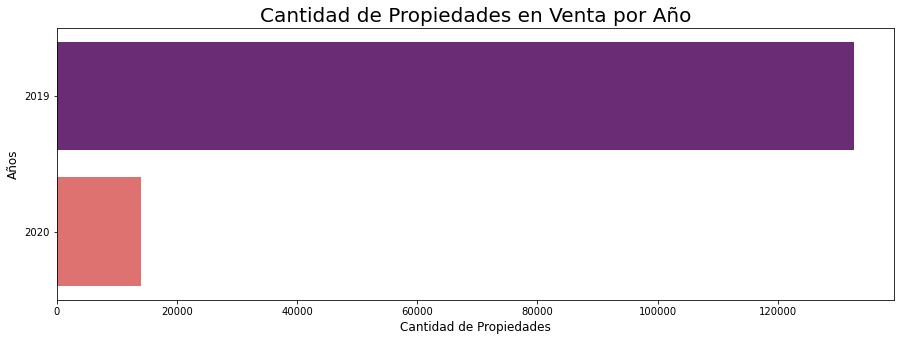

In [8]:
cantidad_prop_año=data['Año'].value_counts().sort_index()
plt.subplots(figsize=(15,5))
grafico_año=sns.barplot(x=cantidad_prop_año.values,y=cantidad_prop_año.index,orient='h',palette='magma')
grafico_año.set_title("Cantidad de Propiedades en Venta por Año",fontsize=20)
grafico_año.set_xlabel("Cantidad de Propiedades",fontsize=12)
grafico_año.set_ylabel("Años",fontsize=12)

## Grafica de las ventas de la cantidad de propiedad por mes
Se evidencio que los meses de Enero, Julio y Novimbre se realizaron mas ventas

Text(0, 0.5, 'Cantidad de Propiedades')

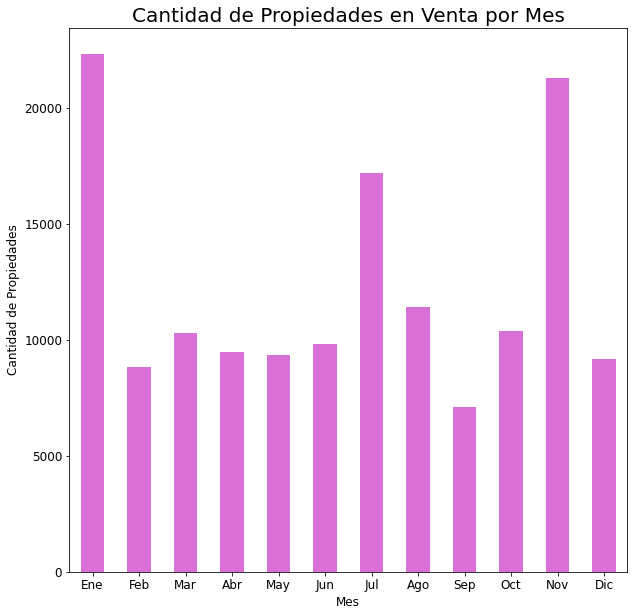

In [9]:
cantidad_prop_mes=data['Mes'].value_counts().sort_index().reset_index()
cantidad_prop_mes['index'].replace({1:'Ene',2:'Feb',3:'Mar',4:'Abr',5:'May',6:'Jun',7:'Jul',8:'Ago',9:'Sep',10:'Oct',11:'Nov',12:'Dic'},inplace=True)
cantidad_prop_mes.set_index(['index'],inplace=True)
grafico_mes=cantidad_prop_mes.plot(kind='bar',color='orchid',fontsize=12,figsize=(10,10),rot=0,legend=False)
grafico_mes.set_title("Cantidad de Propiedades en Venta por Mes",fontsize=20)
grafico_mes.set_xlabel("Mes",fontsize=12)
grafico_mes.set_ylabel("Cantidad de Propiedades",fontsize=12)


CANTIDAD DE PROPIEDADES A LA VENTA POR MESES

In [10]:
fecha_propiedades=data[['Año','Mes','Dia']].copy()
fecha_propiedades['Valor']=1
anio_mes=fecha_propiedades.pivot_table(index='Mes',columns='Año',values='Valor',aggfunc='count')
anio_mes.rename(index={1:'Ene',2:'Feb',3:'Mar',4:'Abr',5:'May',6:'Jun',7:'Jul',8:'Ago',9:'Sep',10:'Oct',11:'Nov',12:'Dic'},inplace=True)
anio_mes

Año     2019     2020
Mes                  
Ene   8325.0  14011.0
Feb   8839.0      NaN
Mar  10283.0      NaN
Abr   9483.0      NaN
May   9335.0      NaN
Jun   9832.0      NaN
Jul  17194.0      NaN
Ago  11411.0      NaN
Sep   7098.0      NaN
Oct  10371.0      NaN
Nov  21306.0      NaN
Dic   9172.0      NaN

## Grafica de la relacion del precio y el año
Visualizamos que el precio de venta fue mas alto en el mes de octubre

In [11]:
precio_anio_mes=data[['Año','Mes','price']].copy()
group_precio_anio_mes=precio_anio_mes.pivot_table(index='Mes',columns='Año',values='price',aggfunc='mean')
group_precio_anio_mes

Año           2019           2020
Mes                              
1    224020.000961  220863.603954
2    236508.313384            NaN
3    240776.131576            NaN
4    237333.868607            NaN
5    242967.240493            NaN
6    227585.219894            NaN
7    264978.096545            NaN
8    251142.592323            NaN
9    240753.614962            NaN
10   271889.433709            NaN
11   239674.990754            NaN
12   222227.837549            NaN

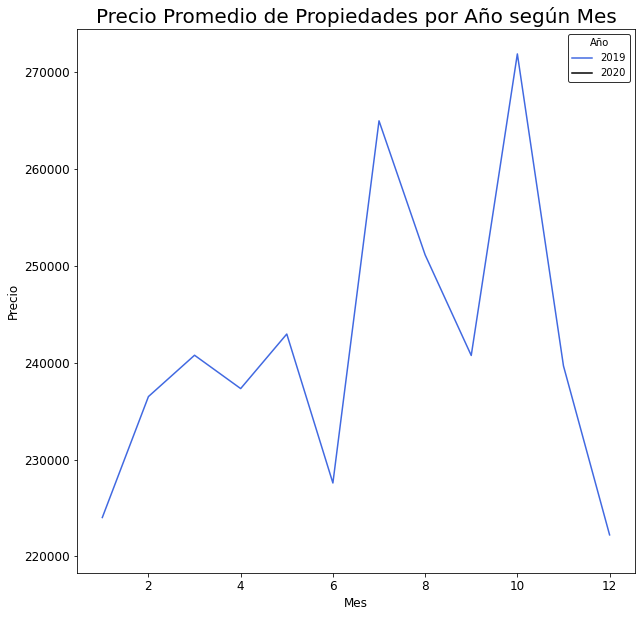

In [12]:
grafico_group_precio_anio_mes=group_precio_anio_mes.plot(kind='line',color=['royalblue','black','tomato','chartreuse','orchid'],figsize=(10,10),fontsize=12)
grafico_group_precio_anio_mes.set_title("Precio Promedio de Propiedades por Año según Mes",fontsize=20)
grafico_group_precio_anio_mes.set_xlabel("Mes",fontsize=12)
grafico_group_precio_anio_mes.set_ylabel("Precio",fontsize=12)
leyenda=plt.legend(['2019','2020'],fontsize=10,title='Año',frameon=True,facecolor='white',edgecolor='black',loc='best')
leyenda.get_frame().set_linewidth(1.0)

## Grafica de la relacion del tipo de propiedad por año
Visualizamos que el precio de venta fue mas alto en el mes de octubre

In [13]:
tipo_propiedad_top=data['property_type'].value_counts().head(10).reset_index()
tipo_propiedad_top.drop(columns={'property_type'},inplace=True)
tipo_propiedad_top.rename(columns={'index':'property_type'},inplace=True)
tipo_propiedad_top

property_type
0     Departamento
1             Casa
2               PH
3             Lote
4          Oficina
5             Otro
6  Local comercial
7    Casa de campo
8         Depósito
9          Cochera

## Grafica de los diferentes tipos de propiedad y la cantidad que swe encuentran en venta
Visibilizando los tipo de propiedad que estan presenten en gran parte de nuestro data, ademas de subrrayar los departamentos como la propiedad que s encuentra mas en venta

[Text(0, 0, 'Departamento'),
 Text(0, 0, 'PH'),
 Text(0, 0, 'Casa'),
 Text(0, 0, 'Lote'),
 Text(0, 0, 'Casa de campo'),
 Text(0, 0, 'Oficina'),
 Text(0, 0, 'Otro'),
 Text(0, 0, 'Local comercial'),
 Text(0, 0, 'Cochera'),
 Text(0, 0, 'Depósito')]

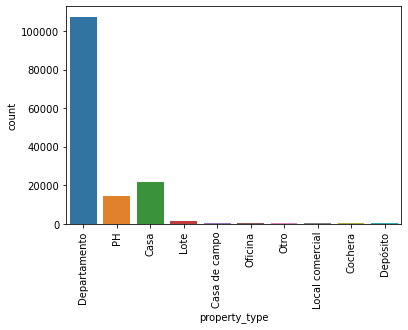

In [14]:
import seaborn as sns
import numpy as np
#Mirar tipo de propiedad

chart=sns.countplot(x="property_type", data=data, order=['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

## Grafica de los diferentes tipos de propiedad y la cantidad que swe encuentran en venta
Visibilizando los tipo de propiedad que estan presenten en gran parte de nuestro data, ademas de subrrayar los departamentos como la propiedad que s encuentra mas en venta

In [15]:
año_tipo=data[['Año','property_type']].copy()
año_tipo.dropna(inplace=True)
año_tipo_top=pd.merge(año_tipo,tipo_propiedad_top,on='property_type',how='inner')
año_tipo_top['Valor']=1
cantidad_año_tipo_top=año_tipo_top.pivot_table(index='property_type',columns='Año',values='Valor',aggfunc='sum')
cantidad_año_tipo_top.head()

Año             2019  2020
property_type             
Casa           19037  2484
Casa de campo    284    38
Cochera          120   139
Departamento   97530  9796
Depósito         242    23

[Text(0, 0.5, 'Casa'),
 Text(0, 1.5, 'Casa de campo'),
 Text(0, 2.5, 'Cochera'),
 Text(0, 3.5, 'Departamento'),
 Text(0, 4.5, 'Depósito'),
 Text(0, 5.5, 'Local comercial'),
 Text(0, 6.5, 'Lote'),
 Text(0, 7.5, 'Oficina'),
 Text(0, 8.5, 'Otro'),
 Text(0, 9.5, 'PH')]

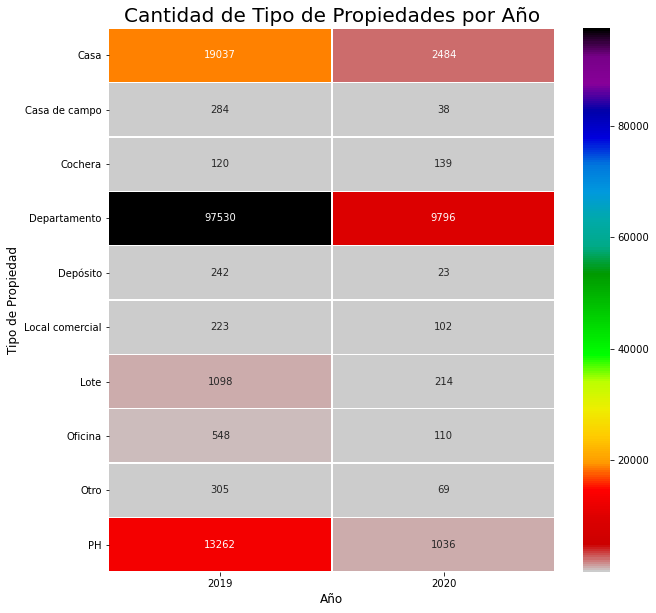

In [16]:
plt.subplots(figsize=(10,10))
grafico_cantidad_año_tipo_top=sns.heatmap(cantidad_año_tipo_top,linewidths=.5,fmt="d",annot=True,cmap="nipy_spectral_r")
grafico_cantidad_año_tipo_top.set_title("Cantidad de Tipo de Propiedades por Año",fontsize=20)
grafico_cantidad_año_tipo_top.set_xlabel("Año",fontsize=12)
grafico_cantidad_año_tipo_top.set_ylabel("Tipo de Propiedad",fontsize=12)
grafico_cantidad_año_tipo_top.set_yticklabels(grafico_cantidad_año_tipo_top.get_yticklabels(),rotation=0)

## Grafica de los diferentes tipos de propiedad y su precio promedio
Visibilizando los tipo de propiedad que el precio es mas elevado es el deposito

Text(0, 0.5, 'Tipo de Propiedad')

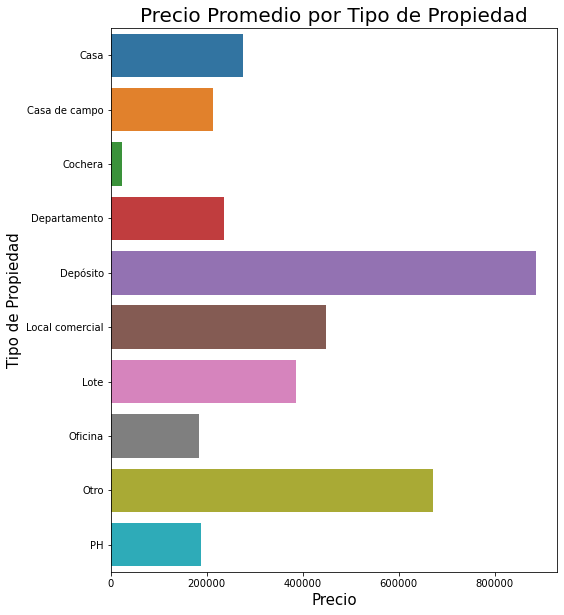

In [17]:
precio_tipo=data.groupby(['property_type']).agg({'price':'mean'})
precio_tipo=precio_tipo.reset_index()
plt.subplots(figsize=(8,10))
grafico_precio_promedio_por_tipo=sns.barplot(y=precio_tipo['property_type'],x=precio_tipo['price'], orient='h')
grafico_precio_promedio_por_tipo.set_title("Precio Promedio por Tipo de Propiedad",fontsize=20)
grafico_precio_promedio_por_tipo.set_xlabel("Precio",fontsize=15)
grafico_precio_promedio_por_tipo.set_ylabel("Tipo de Propiedad",fontsize=15)

## Grafica de caja de los precios de las principales propiedades

In [18]:
tipo_precio=data[['property_type','price']].copy()
tipo_precio.dropna(subset=['property_type'],inplace=True)
tipo_precio_top=pd.merge(tipo_precio,tipo_propiedad_top,on='property_type',how='inner')
tipo_precio_top.head()

property_type     price
0  Departamento  153000.0
1  Departamento  149000.0
2  Departamento  115000.0
3  Departamento   45000.0
4  Departamento   35000.0

Text(0.5, 0, 'Tipo de Propiedad')

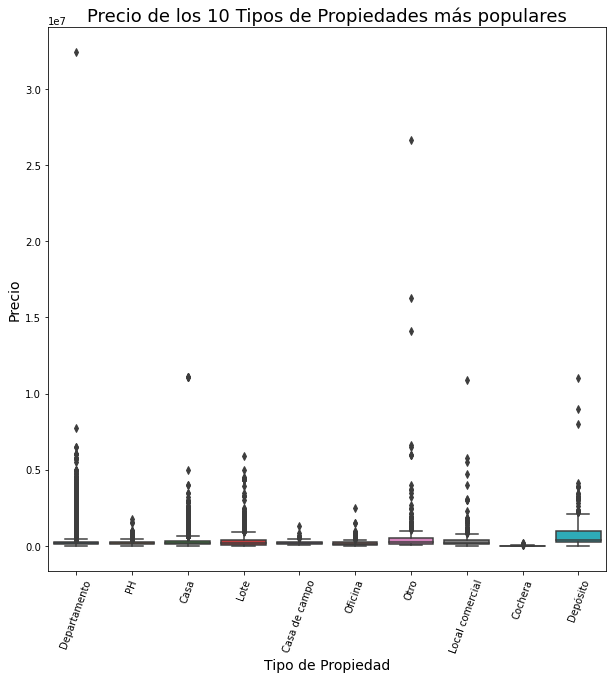

In [19]:
plt.subplots(figsize=(10,10))
grafico_tipo_precio_top=sns.boxplot(y=tipo_precio_top['price'],x=tipo_precio_top['property_type'])
grafico_tipo_precio_top.set_xticklabels(grafico_tipo_precio_top.get_xticklabels(),rotation=70)
grafico_tipo_precio_top.set_title("Precio de los 10 Tipos de Propiedades más populares",fontsize=18)
grafico_tipo_precio_top.set_ylabel("Precio",fontsize=14)
grafico_tipo_precio_top.set_xlabel("Tipo de Propiedad",fontsize=14)
#df3=df2.plot.box(showfliers = False)
#fig=plt.figure(figsize=(50,150))
#df3.set_xticklabels(df3.get_xticklabels(), rotation=90)
#plt.show()

## Grafica de la ocupacion de la superificia total segun la propiedad


In [20]:
tipo_propiedad_cubiertos=data.groupby(['property_type']).agg({'surface_total':'mean'})
tipo_propiedad_cubiertos

surface_total
property_type                 
Casa                660.102807
Casa de campo      4018.581395
Cochera              13.500000
Departamento         99.191757
Depósito            624.375000
Local comercial     258.583333
Lote               2481.002837
Oficina              81.956853
Otro               8249.772727
PH                  172.982074

Text(0, 0.5, 'Tipo de Propiedad')

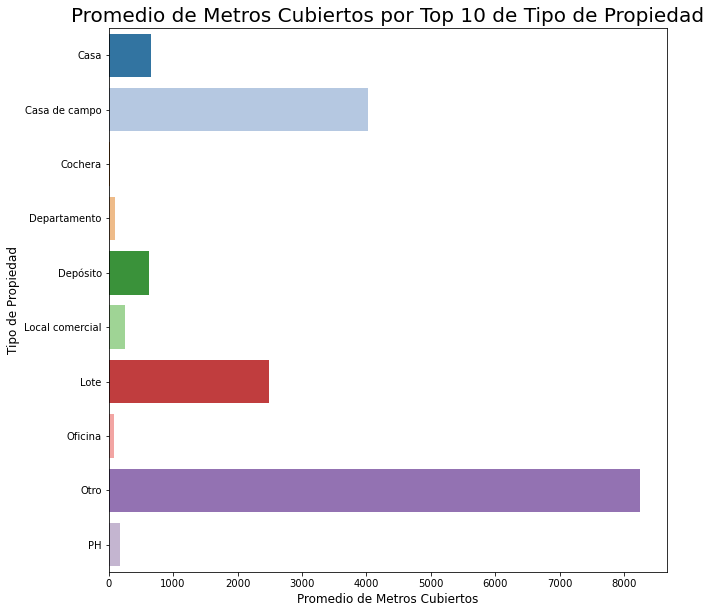

In [21]:
plt.subplots(figsize=(10,10))
grafico_tipo_cubiertos=sns.barplot(x=tipo_propiedad_cubiertos['surface_total'],y=tipo_propiedad_cubiertos.index,orient='h',palette='tab20')
grafico_tipo_cubiertos.set_title("Promedio de Metros Cubiertos por Top 10 de Tipo de Propiedad",fontsize=20)
grafico_tipo_cubiertos.set_xlabel("Promedio de Metros Cubiertos",fontsize=12)
grafico_tipo_cubiertos.set_ylabel("Tipo de Propiedad",fontsize=12)

## Grafica de las diferentes zonas y ciudades, donde se encuentran en venta las diferentes propiedades.
Las cuales predoniman en zonas la capital federal y en ciudades Palermo y tigre

In [22]:
cantidad_propiedades=data['l2'].value_counts().reset_index()
cantidad_propiedades.rename(columns={'index':'l2','l2':'cantidad'},inplace=True)
cantidad_propiedades

l2  cantidad
0           Capital Federal     92539
1  Bs.As. G.B.A. Zona Norte     24282
2    Bs.As. G.B.A. Zona Sur     17173
3  Bs.As. G.B.A. Zona Oeste     12666

In [23]:
cantidad_propiedades=data['l3'].value_counts().reset_index()
cantidad_propiedades.rename(columns={'index':'l3','l3':'cantidad'},inplace=True)
cantidad_propiedades

l3  cantidad
0           Palermo     13073
1             Tigre      8718
2           Almagro      7527
3          Belgrano      6935
4         Caballito      6650
..              ...       ...
84         Cañuelas       108
85    Villa Soldati        69
86  Villa Riachuelo        42
87       Marcos Paz        35
88        Catalinas         5

[89 rows x 2 columns]

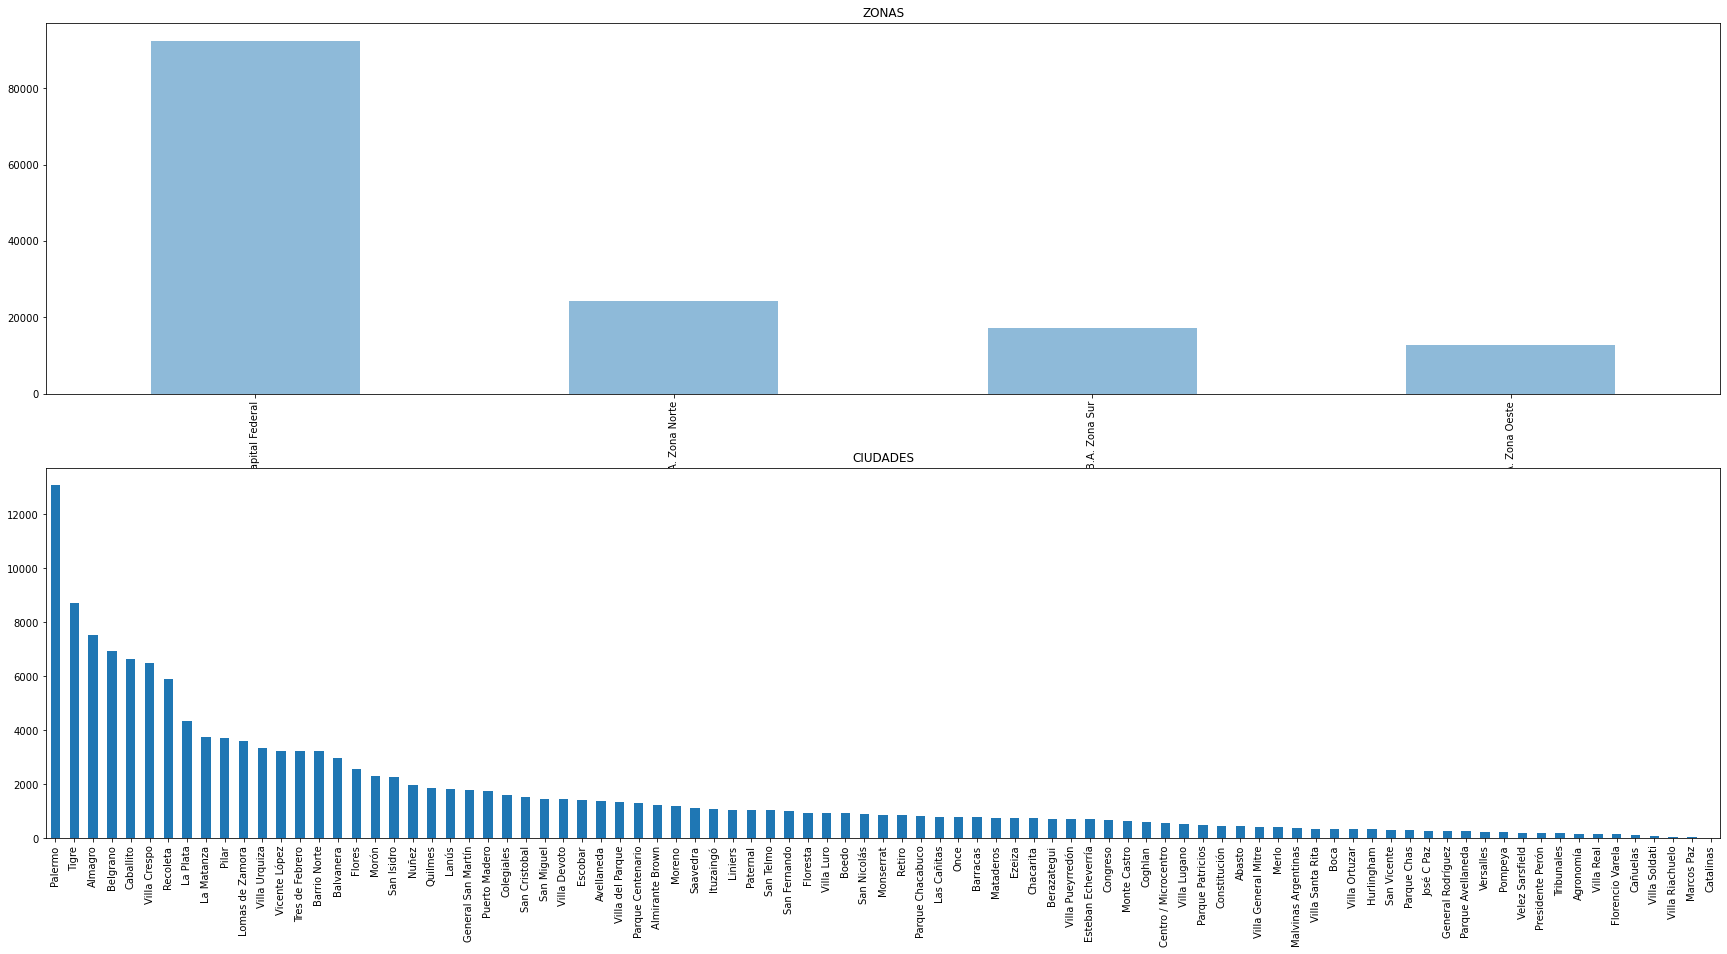

In [24]:
fig=plt.figure(figsize=(30,15)) #tamaño de la imagen

plt.subplot(2,1,1)
data.l2.value_counts().plot(kind='bar', alpha=0.5)
plt.title('ZONAS')

plt.subplot(2,1,2)
data.l3.value_counts().plot(kind='bar', alpha=1)
plt.title('CIUDADES')

plt.show()

## Grafica de las zonas mas caras
Las cuales predoniman en zonas la capital federal 

Text(0, 0.5, 'Zona')

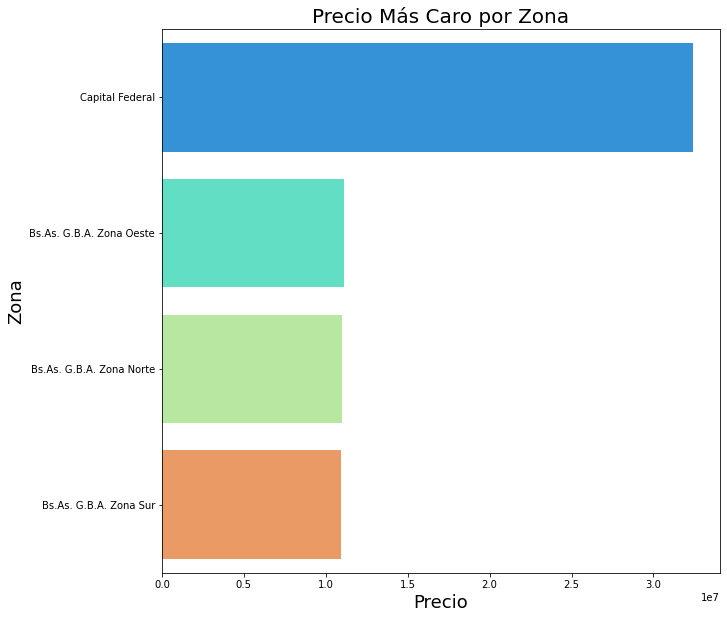

In [25]:
plt.subplots(figsize=(10,10))
precio_provincia_mas_caro=data.groupby(['l2'], sort=False)['price'].max().sort_values(ascending=False)[0:19]
provincia_mas_caro = sns.barplot(x=precio_provincia_mas_caro.values,y=precio_provincia_mas_caro.index,orient='h',palette='rainbow')
provincia_mas_caro.set_title('Precio Más Caro por Zona', fontsize=20);
provincia_mas_caro.set_xlabel('Precio', fontsize=18)
provincia_mas_caro.set_ylabel('Zona', fontsize=18)

## Grafica de las ciudades mas caras
Se eviddencia que las ciudades mas costosas con Palermom y Monserrat

Text(0, 0.5, 'Ciudad')

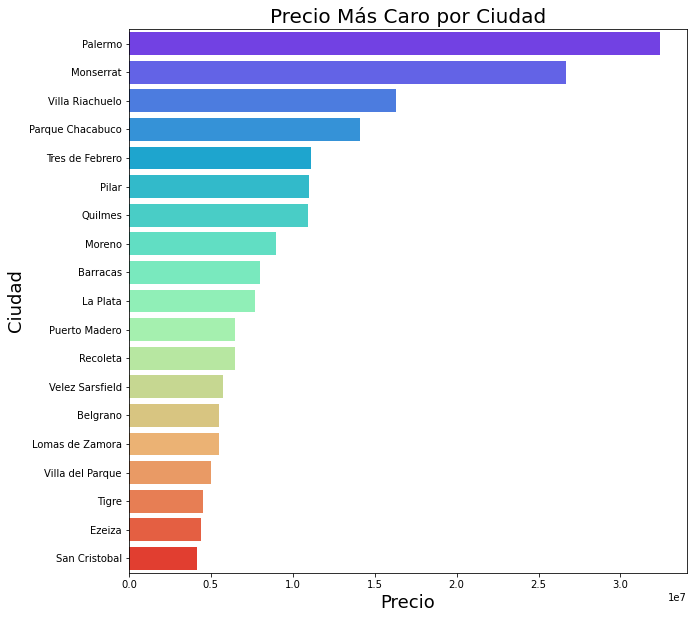

In [26]:
plt.subplots(figsize=(10,10))
precio_provincia_mas_caro=data.groupby(['l3'], sort=False)['price'].max().sort_values(ascending=False)[0:19]
provincia_mas_caro = sns.barplot(x=precio_provincia_mas_caro.values,y=precio_provincia_mas_caro.index,orient='h',palette='rainbow')
provincia_mas_caro.set_title('Precio Más Caro por Ciudad', fontsize=20);
provincia_mas_caro.set_xlabel('Precio', fontsize=18)
provincia_mas_caro.set_ylabel('Ciudad', fontsize=18)

## MAPA ARGENTINA-SOMBREADO DE COLOR DONDE SE ENCUNTRAN LAS CIUDADES Y LAS PROPIEDADES PRINCIPALES


In [27]:
import folium
from folium import Marker
from folium.plugins import HeatMap

In [28]:
map_2 = folium.Map(width = 1200, height = 800, location=[-34.586662, -58.436620], titles="cartodbposition", zoom_start=12)
df_CABA_dolar_noLatNorLonMissing = data[data["lat"].notnull() & data["lon"].notnull()]
HeatMap(data=df_CABA_dolar_noLatNorLonMissing[["lat","lon"]], radius=12).add_to(map_2)

In [29]:
map_2

## Grafica de la ocupacion de la superificia total segun el numero de habitaciones


In [30]:
habitaciones_metros_totales=data[['bedrooms','surface_total']].copy()
habitaciones_metros_totales.dropna(inplace=True)
habitaciones_metros_totales['bedrooms']=habitaciones_metros_totales['bedrooms'].astype('int32')
group_habitaciones_metros_totales=habitaciones_metros_totales.groupby(['bedrooms']).agg({'surface_total':'mean'})
group_habitaciones_metros_totales

surface_total
bedrooms               
0             40.345081
1             77.480568
2            188.510924
3            300.917999
4            619.716409
5            864.841601
6           1052.324459
7            646.100000
8           1046.953125
9            966.785714
10          1797.869565
11           189.642857
12           536.187500
13           520.666667
14           312.750000
15           527.500000

Text(0, 0.5, 'Metros Cubiertos Promedio')

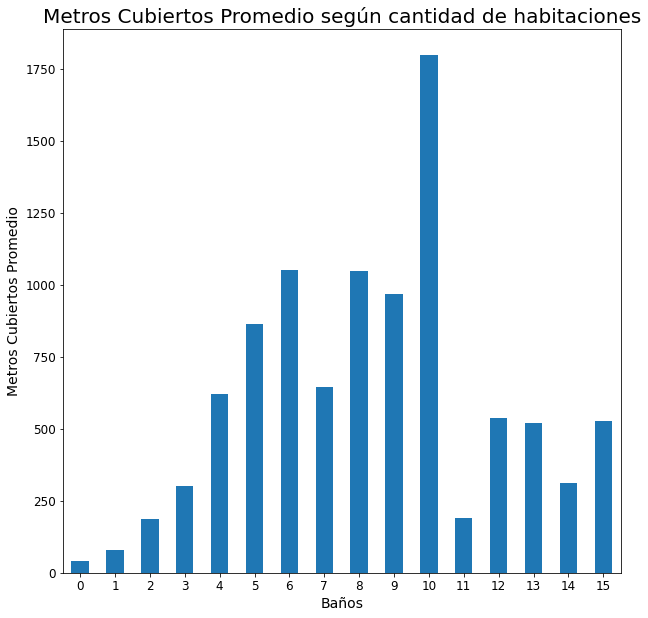

In [31]:
grafico_habitaciones_metros_cubiertos=group_habitaciones_metros_totales.plot(kind='bar',fontsize=12,figsize=(10,10),rot=0,legend=False)
grafico_habitaciones_metros_cubiertos.set_title("Metros Cubiertos Promedio según cantidad de habitaciones",fontsize=20)
grafico_habitaciones_metros_cubiertos.set_xlabel("Baños",fontsize=14)
grafico_habitaciones_metros_cubiertos.set_ylabel("Metros Cubiertos Promedio",fontsize=14)

## Grafica de la ocupacion de la superificia total segun el numero de baños


In [32]:
baños_metros_cubiertos=data[['bathrooms','surface_total']].copy()
baños_metros_cubiertos.dropna(inplace=True)
baños_metros_cubiertos['bathrooms']=baños_metros_cubiertos['bathrooms'].astype('int32')
group_baños_metros_cubiertos=baños_metros_cubiertos.groupby(['bathrooms']).agg({'surface_total':'mean'})
group_baños_metros_cubiertos

surface_total
bathrooms               
1             141.528161
2             231.160197
3             458.844961
4             519.617991
5             699.096040
6            1001.919679
7            1696.146067
8            1953.923077
9            1081.600000
10           3821.700000
11            135.142857
12             38.000000
13            613.000000
14             67.333333

In [33]:
#data['operation_type'].unique()-----------------------------------------------------------------------------

Text(0, 0.5, 'Metros Cubiertos Promedio')

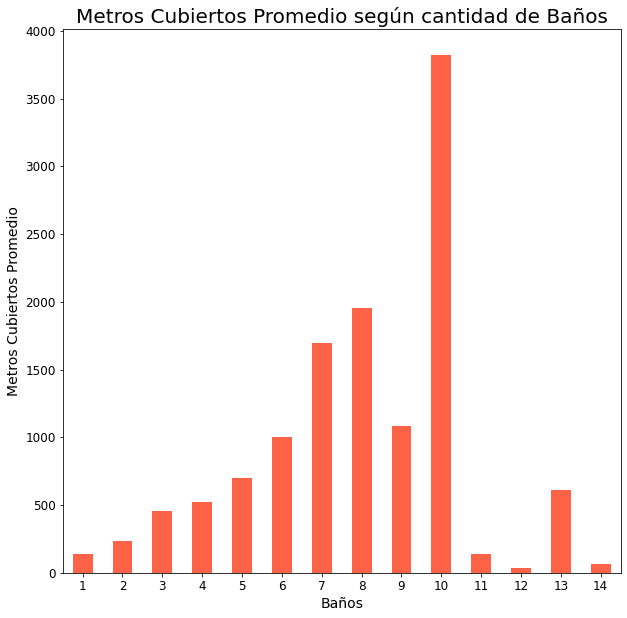

In [34]:
grafico_baños_metros_cubiertos=group_baños_metros_cubiertos.plot(kind='bar',color='tomato',fontsize=12,figsize=(10,10),rot=0,legend=False)
grafico_baños_metros_cubiertos.set_title("Metros Cubiertos Promedio según cantidad de Baños",fontsize=20)
grafico_baños_metros_cubiertos.set_xlabel("Baños",fontsize=14)
grafico_baños_metros_cubiertos.set_ylabel("Metros Cubiertos Promedio",fontsize=14)

 **Averigue en el dataset los valores Faltantes**

In [35]:
#Valores faltantes por columna uso funcion isna
print(df.isna().sum())

lat                 9925
lon                 9959
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
title                  0
description            0
property_type          0
Created_on             0
Año                    0
Mes                    0
Dia                    0
dtype: int64


-Verifico que en mis columnas que tienen datos faltantes (lat,lon,bathrooms,surface_total, surface_covered) son columnas de tipo de datos 'float',por lo tanto al no contener valores nominales en este caso el uso del encoding de pasar los datos a numeros no es necsario.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   lat              136735 non-null  float64       
 1   lon              136701 non-null  float64       
 2   l2               146660 non-null  object        
 3   l3               146660 non-null  object        
 4   rooms            146660 non-null  float64       
 5   bedrooms         146660 non-null  float64       
 6   bathrooms        140703 non-null  float64       
 7   surface_total    126133 non-null  float64       
 8   surface_covered  125046 non-null  float64       
 9   price            146660 non-null  float64       
 10  title            146660 non-null  object        
 11  description      146660 non-null  object        
 12  property_type    146660 non-null  object        
 13  Created_on       146660 non-null  datetime64[ns]
 14  Año              146

Utilice la "imputacion de valores faltantes" con la funcion fillna, ya que al ser valores float, coloque en los datos faltantes -realice una interpolacion- de los valores de la  columna para poder evaluar su comportamiento,teniendo presente el anterior proyecto se realizo una eliminacion total de los mismos, sobretodo en la columna 'bathrooms', es importante conocer en estas instancias que puede haber sucedido si existiera este valor. 

In [37]:
#df.fillna(df.mean())
#inplace=True)
#df1 = df.fillna(df.median())#averiguar si puedo colocar el proemdio de los valores de la columna o interpolar
#print(df1.isna().sum())
#df1.shape

In [38]:
#df[]. replace(1, inplace-True)
df1=df.fillna(1).interpolate()
#df1=df.fillna(1).mean()
print(df1.isna().sum())

lat                0
lon                0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
title              0
description        0
property_type      0
Created_on         0
Año                0
Mes                0
Dia                0
dtype: int64


In [39]:
df1.bedrooms.replace(0,1)

0         7.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
146655    1.0
146656    3.0
146657    1.0
146658    1.0
146659    2.0
Name: bedrooms, Length: 146660, dtype: float64

 **DATOS ATIPICOS O OUTLIERS**, se realiza una exploracion de datos de las siguientes columnas

In [40]:
mascara= df1[(df1.property_type.isin(["Departamento","PH","Casa"])) &
             (df1.l2.isin(["Capital Federal"])) & (df1.l3.isin(["Palermo", "Monserrat", "Villa Riachuelo"])) ]

print("property_type:", mascara["property_type"].unique())
print("l2: ", mascara["l2"].unique())
print("l3: ", mascara["l3"].unique())

property_type: ['PH' 'Departamento' 'Casa']
l2:  ['Capital Federal']
l3:  ['Palermo' 'Monserrat' 'Villa Riachuelo']


## RELACION FEATURES


In [41]:
df2=mascara[['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price','property_type', 'l2','l3']] 
df2.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  13871.000000  13871.000000  13871.000000  13871.000000  13871.000000   
mean     -31.737083    -53.652758      2.952347      1.922861      1.592820   
std        9.660234     16.142998      1.285589      1.005732      0.898539   
min      -34.696419    -58.498913      1.000000      0.000000      1.000000   
25%      -34.592167    -58.428960      2.000000      1.000000      1.000000   
50%      -34.584907    -58.421457      3.000000      2.000000      1.000000   
75%      -34.578066    -58.411122      4.000000      3.000000      2.000000   
max        1.000000      1.000000     15.000000     14.000000     14.000000   

       surface_total  surface_covered         price  
count   13871.000000     13871.000000  1.387100e+04  
mean       97.676087        87.852714  3.421727e+05  
std       223.960844       270.113303  4.970850e+05  
min         1.000000         1.000000  6.000000e+03  
25%        47.000000        43.000000  1.490000e+05  
50%        70.000000        61.000000  2.190000e+05  
75%       106.000000        95.000000  3.500000e+05  
max     14834.000000     13857.000000  3.243423e+07

## Grafica de caja de los feature mas importantes con outliers


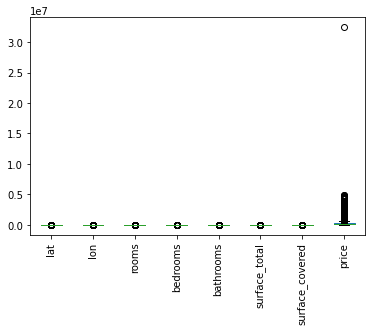

<Figure size 216000x108000 with 0 Axes>

In [42]:
#En el siguiente grafica como los outliers pueden afectar la visibilidad en cuanto al analisis apropiado, de una parte de nuestro data frame:
import seaborn as sns
import  matplotlib.pyplot  as plt
import numpy as np

df3=df2.plot.box()
fig=plt.figure(figsize=(3000,1500))
df3.set_xticklabels(df3.get_xticklabels(), rotation=90)
plt.show()

## Grafica de caja de los feature mas importantes sin outliers


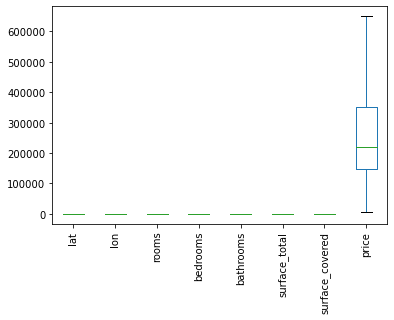

<Figure size 3600x10800 with 0 Axes>

In [43]:
#En el siguiente grafica se puede visibilizar quitando los outliers que la dipersion de datos, al tener presente que algunos feature tiene valores grande con respecto 
#a los otros se trato determinar una mirada mas critica respecto al boxplot, los cuales no se pueden en gran medida apreciar todos , pero si determinar la afectacion
#y eliminacion de outliers
df3=df2.plot.box(showfliers = False)
fig=plt.figure(figsize=(50,150))
df3.set_xticklabels(df3.get_xticklabels(), rotation=90)
plt.show()


In [44]:
#Identificammos cuales feature tiene mayor realcion con las demas, siendo "price", de mayor importancia frente a este tipo de dataset
df2.corr()

lat       lon     rooms  bedrooms  bathrooms  \
lat              1.000000  0.999022 -0.014985 -0.010550   0.020459   
lon              0.999022  1.000000 -0.015141 -0.010758   0.020507   
rooms           -0.014985 -0.015141  1.000000  0.919294   0.622324   
bedrooms        -0.010550 -0.010758  0.919294  1.000000   0.617617   
bathrooms        0.020459  0.020507  0.622324  0.617617   1.000000   
surface_total    0.004477  0.004235  0.248510  0.230164   0.209235   
surface_covered -0.005152 -0.005343  0.186908  0.175132   0.160982   
price            0.016532  0.016195  0.458819  0.408414   0.543144   

                 surface_total  surface_covered     price  
lat                   0.004477        -0.005152  0.016532  
lon                   0.004235        -0.005343  0.016195  
rooms                 0.248510         0.186908  0.458819  
bedrooms              0.230164         0.175132  0.408414  
bathrooms             0.209235         0.160982  0.543144  
surface_total         1.000000         0.634874  0.208475  
surface_covered       0.634874         1.000000  0.160718  
price                 0.208475         0.160718  1.000000

## MATRIZ DE CORRELACION DE SURFACE_TOTAL CON OTROS FEATURE


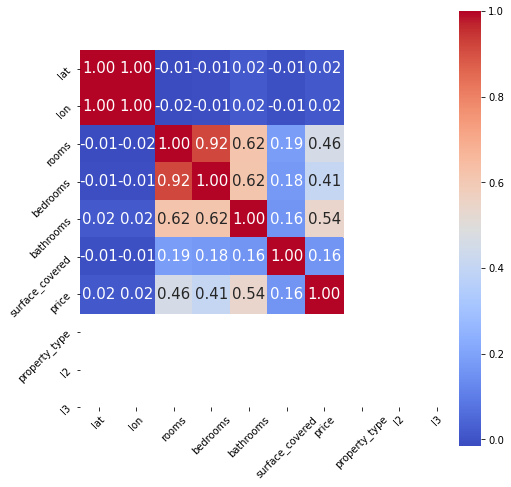

In [45]:
corr = df2.drop(columns = 'surface_total').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df2.drop(columns = 'surface_total').columns, 
           yticklabels= df2.drop(columns = 'surface_total').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

## Grafica de property_type con relacion a los diferentes feature


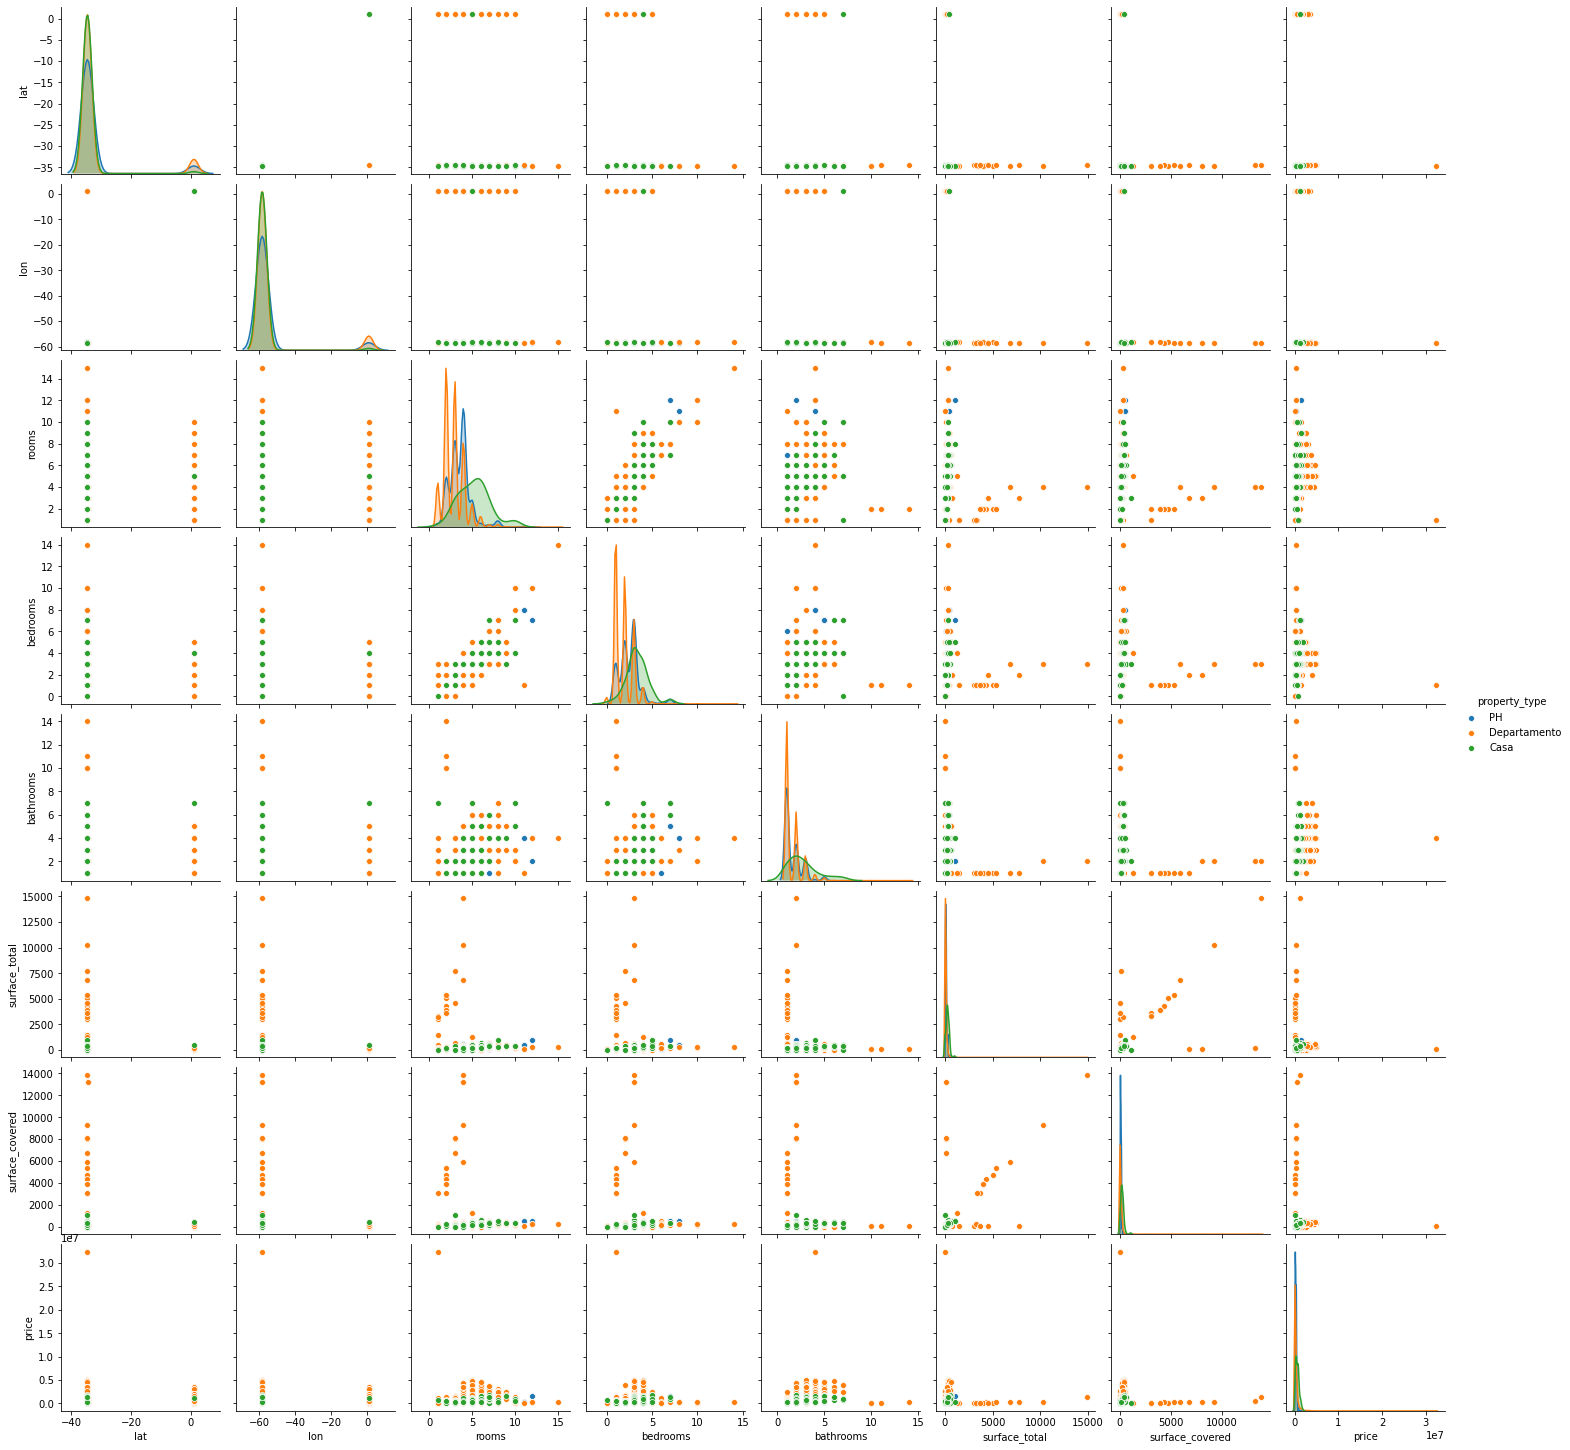

In [46]:
%matplotlib inline 

import seaborn as sns

#data = sns.load_dataset('data_prop')

sns.pairplot(df2, hue = 'property_type')
plt.show()

 **ENCODING-variables dummies**

In [47]:
df31 = pd.get_dummies(df2, prefix='property_type_', columns=['property_type'])

In [48]:
df31.head()

lat        lon  rooms  bedrooms  bathrooms  surface_total  \
2  -34.593569 -58.427474    2.0       1.0        1.0           45.0   
3  -34.581294 -58.436754    2.0       1.0        1.0           85.0   
34 -34.590031 -58.423771    2.0       1.0        1.0           52.0   
35   1.000000   1.000000    2.0       1.0        2.0           81.0   
36   1.000000   1.000000    2.0       1.0        1.0           42.0   

    surface_covered     price               l2       l3  property_type__Casa  \
2              45.0  125000.0  Capital Federal  Palermo                    0   
3              50.0  295000.0  Capital Federal  Palermo                    0   
34             48.0  188000.0  Capital Federal  Palermo                    0   
35             76.0  410000.0  Capital Federal  Palermo                    0   
36             38.0  169000.0  Capital Federal  Palermo                    0   

    property_type__Departamento  property_type__PH  
2                             0                  1  
3                             0                  1  
34                            1                  0  
35                            1                  0  
36                            1                  0

In [49]:
df32= pd.get_dummies(df31, prefix='l2', columns=['l2'])

In [50]:
df32.head()

lat        lon  rooms  bedrooms  bathrooms  surface_total  \
2  -34.593569 -58.427474    2.0       1.0        1.0           45.0   
3  -34.581294 -58.436754    2.0       1.0        1.0           85.0   
34 -34.590031 -58.423771    2.0       1.0        1.0           52.0   
35   1.000000   1.000000    2.0       1.0        2.0           81.0   
36   1.000000   1.000000    2.0       1.0        1.0           42.0   

    surface_covered     price       l3  property_type__Casa  \
2              45.0  125000.0  Palermo                    0   
3              50.0  295000.0  Palermo                    0   
34             48.0  188000.0  Palermo                    0   
35             76.0  410000.0  Palermo                    0   
36             38.0  169000.0  Palermo                    0   

    property_type__Departamento  property_type__PH  l2_Capital Federal  
2                             0                  1                   1  
3                             0                  1                   1  
34                            1                  0                   1  
35                            1                  0                   1  
36                            1                  0                   1

In [51]:
df3= pd.get_dummies(df32, prefix='l3', columns=['l3'])

In [52]:
df3.head()

lat        lon  rooms  bedrooms  bathrooms  surface_total  \
2  -34.593569 -58.427474    2.0       1.0        1.0           45.0   
3  -34.581294 -58.436754    2.0       1.0        1.0           85.0   
34 -34.590031 -58.423771    2.0       1.0        1.0           52.0   
35   1.000000   1.000000    2.0       1.0        2.0           81.0   
36   1.000000   1.000000    2.0       1.0        1.0           42.0   

    surface_covered     price  property_type__Casa  \
2              45.0  125000.0                    0   
3              50.0  295000.0                    0   
34             48.0  188000.0                    0   
35             76.0  410000.0                    0   
36             38.0  169000.0                    0   

    property_type__Departamento  property_type__PH  l2_Capital Federal  \
2                             0                  1                   1   
3                             0                  1                   1   
34                            1                  0                   1   
35                            1                  0                   1   
36                            1                  0                   1   

    l3_Monserrat  l3_Palermo  l3_Villa Riachuelo  
2              0           1                   0  
3              0           1                   0  
34             0           1                   0  
35             0           1                   0  
36             0           1                   0

In [53]:
# se añade con el anterior dataframe y las juevas variables dummies
df4=pd.concat((df2,df3), axis =1 )

In [54]:
df4

lat        lon  rooms  bedrooms  bathrooms surface_total  \
2      -34.593569 -58.427474    2.0       1.0        1.0          45.0   
3      -34.581294 -58.436754    2.0       1.0        1.0          85.0   
34     -34.590031 -58.423771    2.0       1.0        1.0          52.0   
35       1.000000   1.000000    2.0       1.0        2.0          81.0   
36       1.000000   1.000000    2.0       1.0        1.0          42.0   
...           ...        ...    ...       ...        ...           ...   
146554 -34.585355 -58.427194    4.0       3.0        3.0         175.0   
146555 -34.585355 -58.427194    3.0       2.0        2.0         144.0   
146556 -34.584134 -58.436389    4.0       2.0        2.0         317.0   
146557 -34.583995 -58.417645    3.0       2.0        2.0         145.0   
146558   1.000000   1.000000    4.0       3.0        5.0         220.0   

        surface_covered      price property_type               l2  ...  \
2                  45.0   125000.0            PH  Capital Federal  ...   
3                  50.0   295000.0            PH  Capital Federal  ...   
34                 48.0   188000.0  Departamento  Capital Federal  ...   
35                 76.0   410000.0  Departamento  Capital Federal  ...   
36                 38.0   169000.0  Departamento  Capital Federal  ...   
...                 ...        ...           ...              ...  ...   
146554            111.0   570000.0            PH  Capital Federal  ...   
146555            134.0   480000.0            PH  Capital Federal  ...   
146556            143.0   530000.0            PH  Capital Federal  ...   
146557            145.0   420000.0  Departamento  Capital Federal  ...   
146558            210.0  1470000.0  Departamento  Capital Federal  ...   

       surface_total  surface_covered      price  property_type__Casa  \
2               45.0             45.0   125000.0                    0   
3               85.0             50.0   295000.0                    0   
34              52.0             48.0   188000.0                    0   
35              81.0             76.0   410000.0                    0   
36              42.0             38.0   169000.0                    0   
...              ...              ...        ...                  ...   
146554         175.0            111.0   570000.0                    0   
146555         144.0            134.0   480000.0                    0   
146556         317.0            143.0   530000.0                    0   
146557         145.0            145.0   420000.0                    0   
146558         220.0            210.0  1470000.0                    0   

        property_type__Departamento  property_type__PH  l2_Capital Federal  \
2                                 0                  1                   1   
3                                 0                  1                   1   
34                                1                  0                   1   
35                                1                  0                   1   
36                                1                  0                   1   
...                             ...                ...                 ...   
146554                            0                  1                   1   
146555                            0                  1                   1   
146556                            0                  1                   1   
146557                            1                  0                   1   
146558                            1                  0                   1   

        l3_Monserrat  l3_Palermo  l3_Villa Riachuelo  
2                  0           1                   0  
3                  0           1                   0  
34                 0           1                   0  
35                 0           1                   0  
36                 0           1                   0  
...              ...         ...                 ...  
146554             0           1     

In [55]:
## OUTLIERS--lat
valor_medio = df3.lat.mean()
std = df3.lat.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_lat = np.logical_or(df3.lat < minimo, df3.lat > maximo)
mascara_outliers_lat.sum()
#df2[mascara_outliers_lat]

1111

In [56]:
## OUTLIERS--lon
valor_medio = df3.lon.mean()
std = df3.lon.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_lon = np.logical_or(df3.lon < minimo, df3.lon > maximo)
mascara_outliers_lon.sum()
#df2[mascara_outliers_lon]

1113

In [57]:
## OUTLIERS--rooms
valor_medio = df3.rooms.mean()
std = df3.rooms.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_rooms = np.logical_or(df3.rooms < minimo, df3.rooms > maximo)
mascara_outliers_rooms.sum()
#df2[mascara_outliers_rooms]

205

In [58]:
## OUTLIERS--bedrooms
valor_medio = df3.bedrooms.mean()
std = df3.bedrooms.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_bedrooms = np.logical_or(df3.bedrooms < minimo, df3.bedrooms > maximo)
mascara_outliers_bedrooms.sum()
#df2[mascara_outliers_bedrooms]

125

In [59]:
## OUTLIERS--bathrooms
valor_medio = df3.bathrooms.mean()
std = df3.bathrooms.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_bathrooms = np.logical_or(df3.bathrooms < minimo, df3.bathrooms > maximo)
mascara_outliers_bathrooms.sum()
#df2[mascara_outliers_bathrooms]

201

In [60]:
## OUTLIERS--surface_total
valor_medio = df3.surface_total.mean()
std = df3.surface_total.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_surface_total = np.logical_or(df3.surface_total < minimo, df3.surface_total > maximo)
mascara_outliers_surface_total.sum()
#df2[mascara_outliers_surface_total]

20

In [61]:
## OUTLIERS--surface_covered
valor_medio = df3.surface_covered.mean()
std = df3.surface_covered.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_surface_covered = np.logical_or(df3.surface_covered < minimo, df3.surface_covered > maximo)
mascara_outliers_surface_covered.sum()
#df2[mascara_outliers_surface_covered]

18

---

<br />
<br />

# PARTE B -ENTRENAMIENTO DEL MODELO DEL PROYECTO REALIZANDO PRE-PROCESAMIENTO DE DATOS( MISSING DATA/ OUTLIERS)
<br />
<br />

---

## Separacion de datos en conjuntos de datos de entreno y de prueba para la formación y evaluación de su modelo de proyectos anteriores, pero añadiendo nuestros feature con unos nuevos, especificando zonas y provincias con mayor venta de estos inmuebles.


In [62]:
X=df3[["rooms","bedrooms","surface_total","bathrooms","property_type__Casa","property_type__Departamento","property_type__PH","l2_Capital Federal","l3_Monserrat","l3_Palermo","l3_Villa Riachuelo"]]
#X= df3[["rooms","bedrooms","surface_total","bathrooms", "surface_covered","property_type__Casa","property_type__Departamento","property_type__PH"]]
y=df3.price


**ESCALADO DE FEATURE-DESPUES DE ENTRENAMIENTO DE MODELO** 

In [63]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)

In [64]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

#scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(X)
#scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
#scaled_df.head()

In [65]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.30, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9293, 11) (4578, 11) (9293,) (4578,)


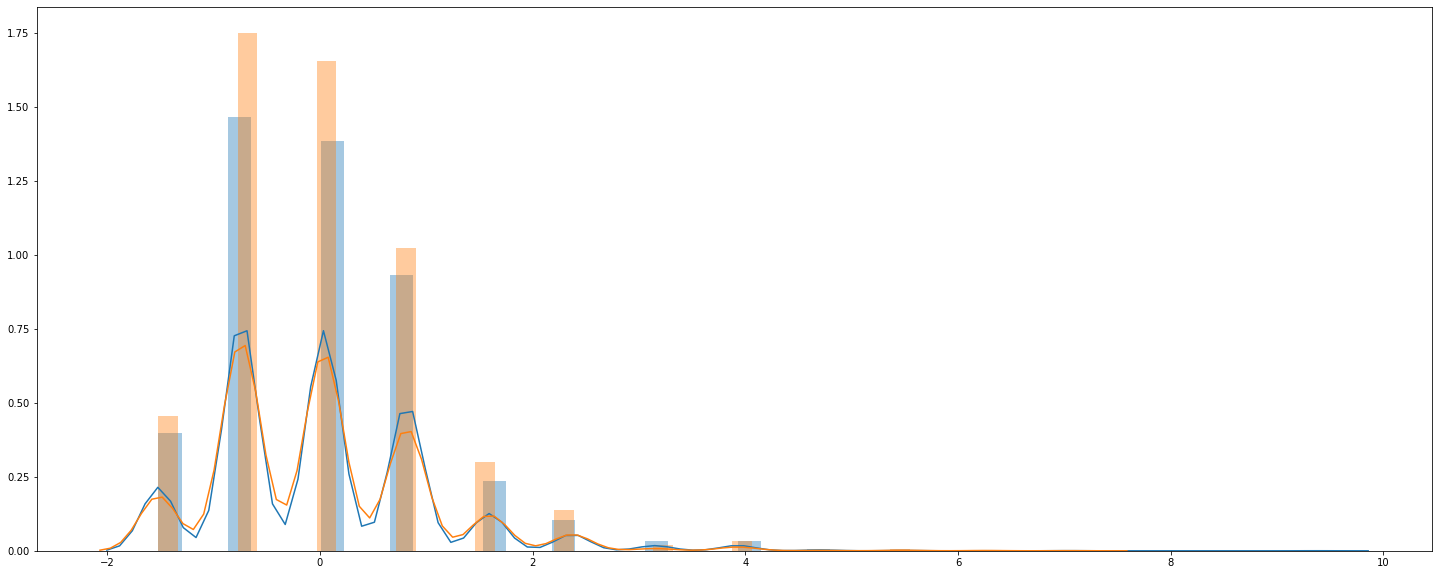

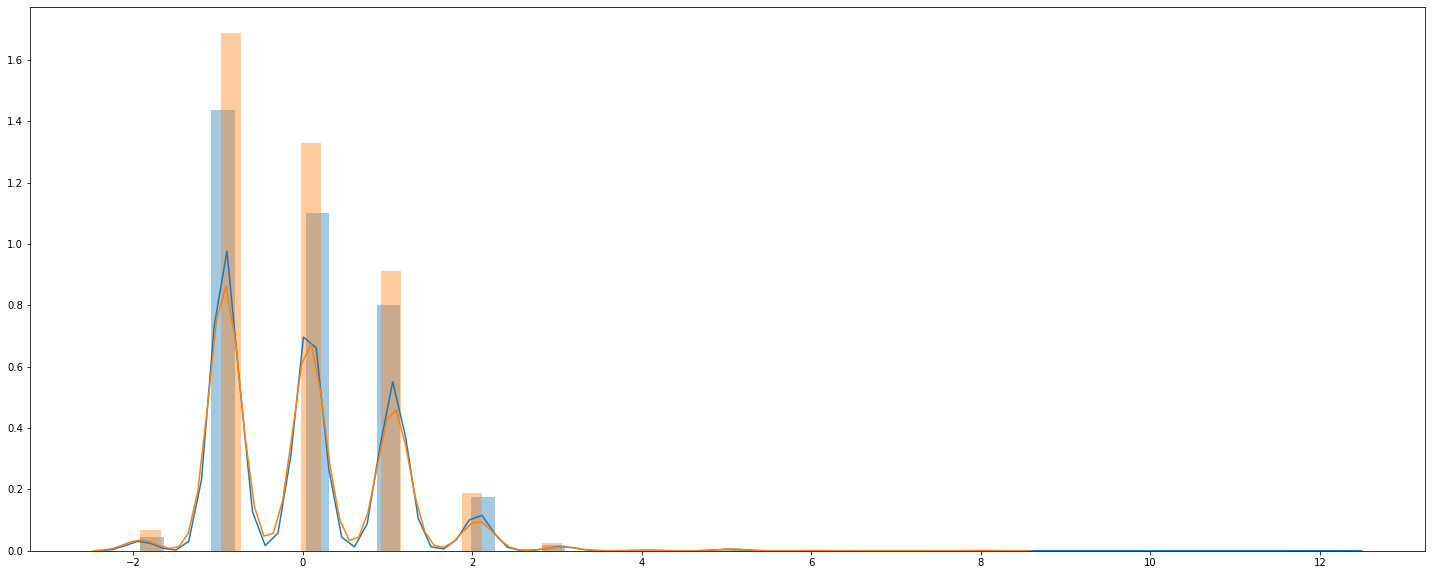

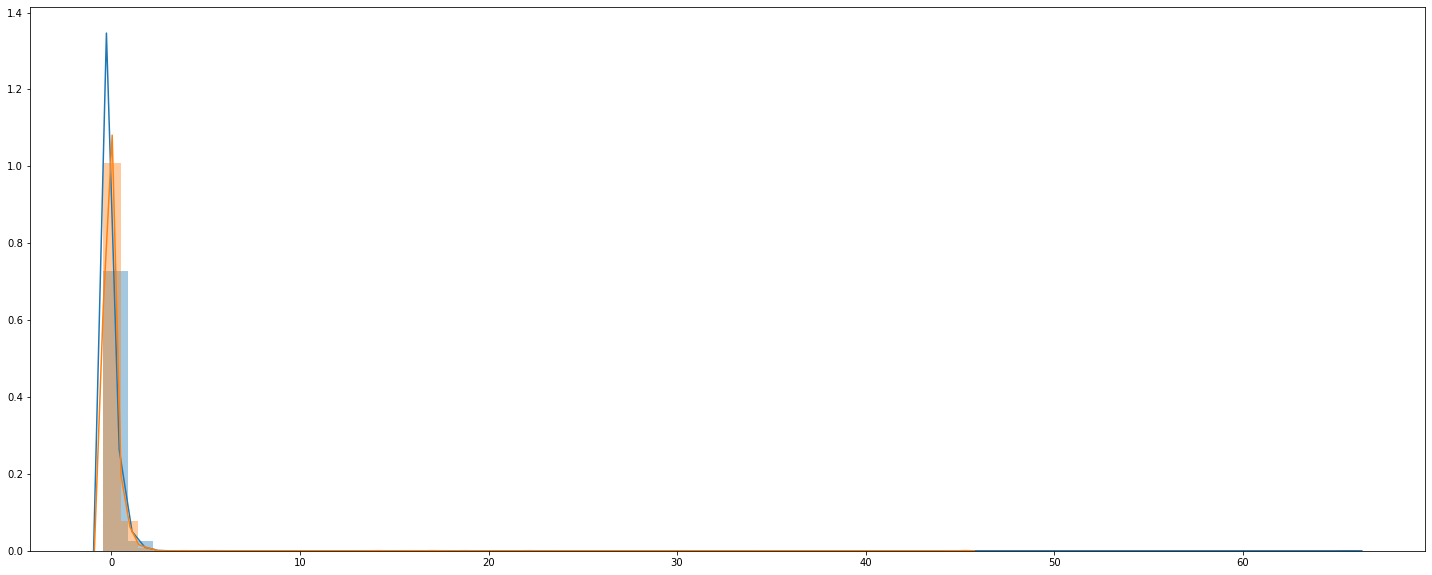

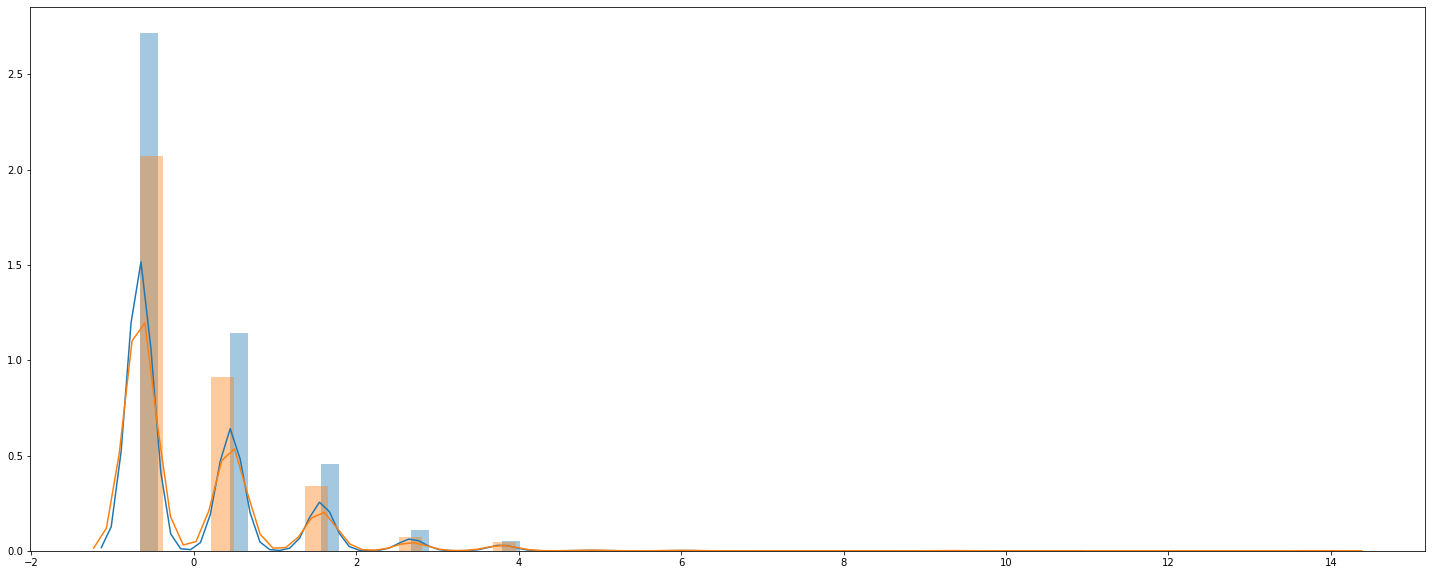

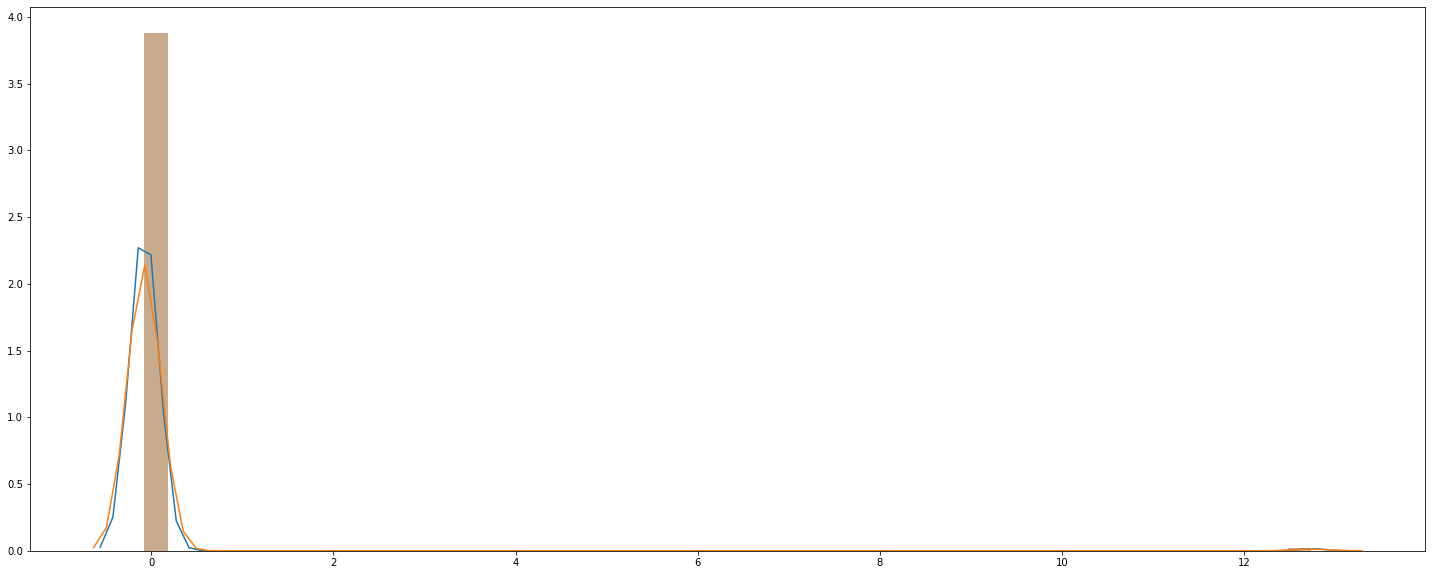

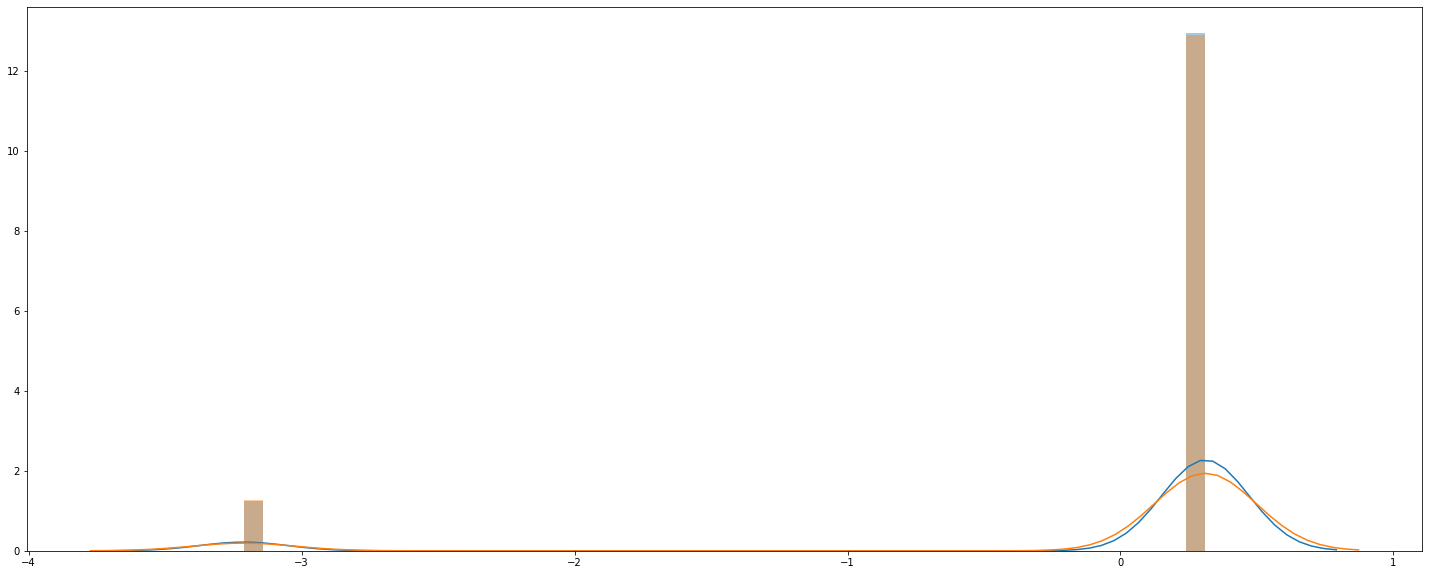

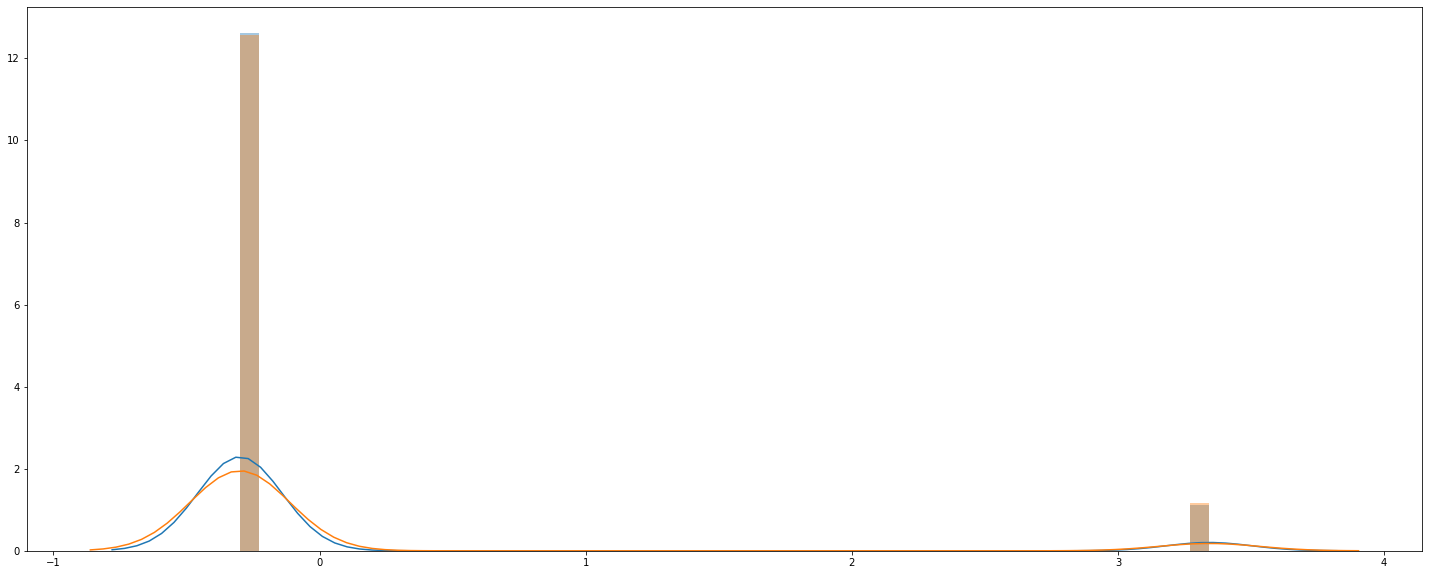

C:\Users\any-0\miniconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\any-0\miniconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


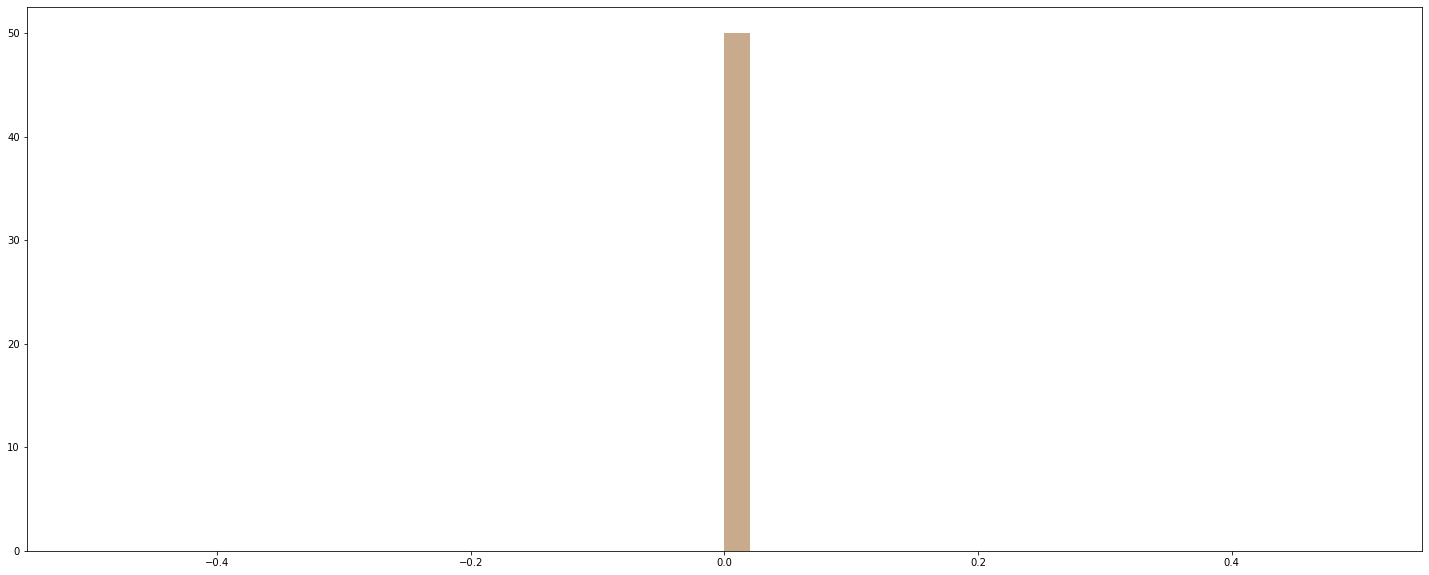

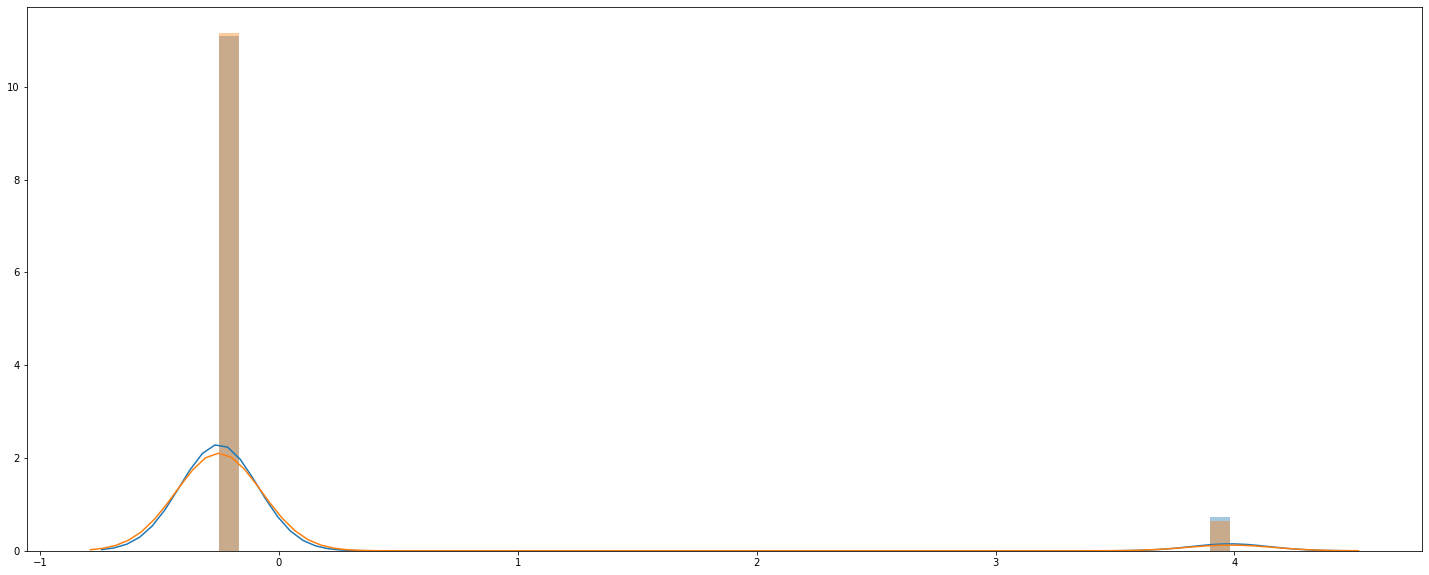

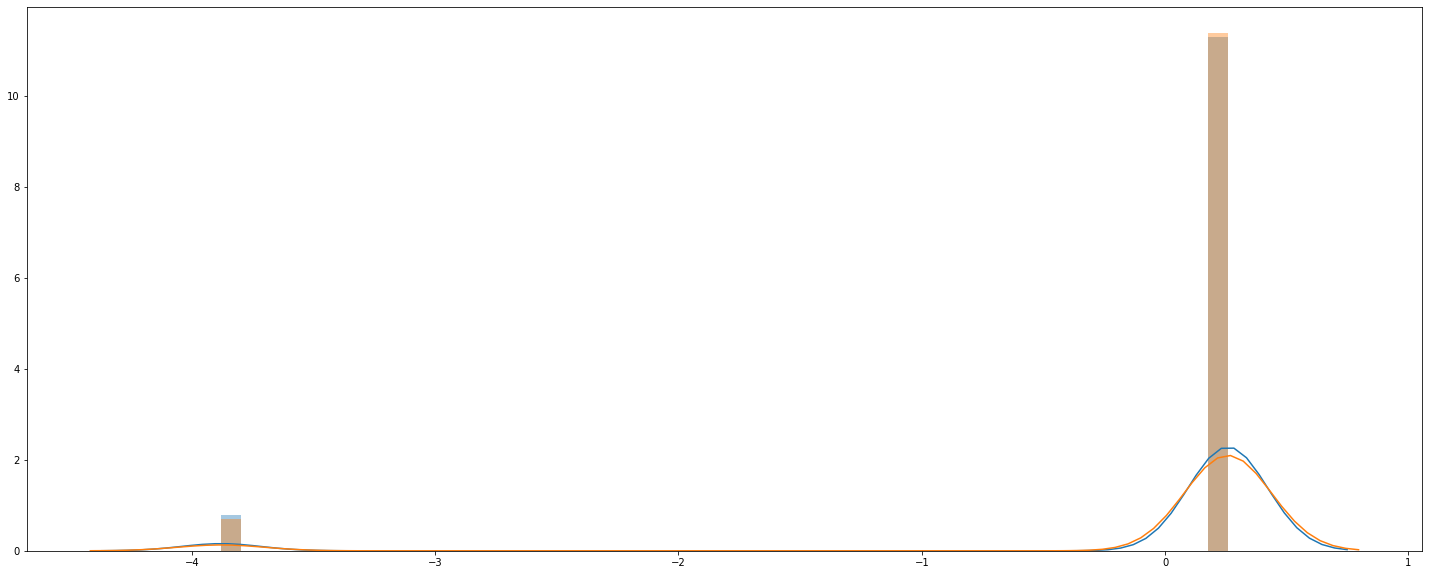

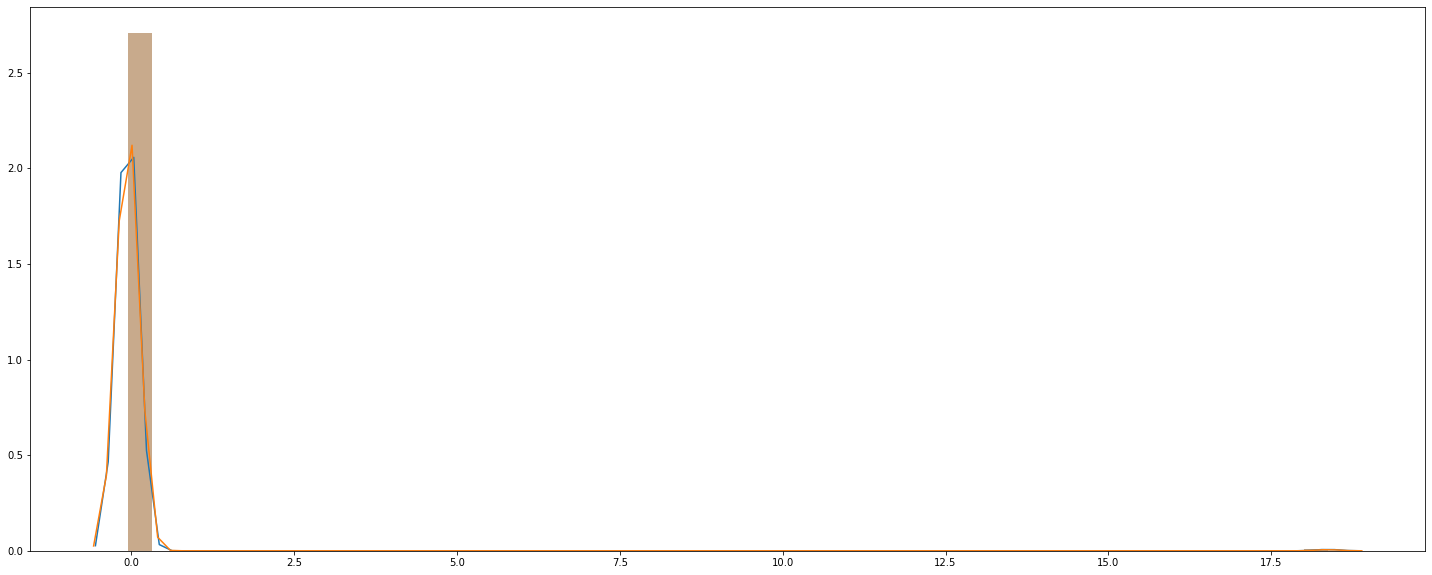

In [66]:
for i in range(X_train.shape[1]):
    plt.figure(figsize=(25,10))
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.show()

---

<br />
<br />

# PARTE C.1 -MODELOS PREDICTION
<br />
<br />

---

## Modelo Lightgbm prediction


In [139]:
import lightgbm as lgb
from sklearn import metrics

In [140]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [141]:
model_lgb.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression')

In [142]:
y_pred= model_lgb.predict(X_test)

In [143]:
from sklearn.metrics import r2_score

R2 = model_lgb.score(X,y)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = metrics.mean_absolute_error(y_test, y_pred)
#R2 = metrics.mean_squared_error(y_test, y_pred)
print('R2:',R2)
print('RMSE:',RMSE)
print('MAE:',MAE)

R2: 0.5411253822516471
RMSE: 212735.51649025764
MAE: 94330.96423908538


In [144]:
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(model_lgb.score(X_train, y_train))

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.49913299765039776


## Modelo KNN prediction


In [145]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

#linear_model = LinearRegression()

In [146]:
# Modelos optimizando el número de vecinos---------------------------------------
n_neighbors=2 # Cuando  el numero de vecinos es menor en el modelo es mas optimo
#clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_regressor.fit(X_train, y_train)
y_pred= knn_regressor.predict(X_test)

In [147]:
# Error de test del modelo KNeighborsRegressor final
from sklearn.metrics import r2_score

R2 = knn_regressor.score(X,y)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = metrics.mean_absolute_error(y_test, y_pred)
#R2 = metrics.mean_squared_error(y_test, y_pred)
print('R2:',R2)
print('RMSE:',RMSE)
print('MAE:',MAE)

R2: 0.8425773669603999
RMSE: 176948.88944704682
MAE: 68003.7117737003


In [148]:
print('DATOS DEL MODELO VECINO MAS CERCANO REGRESION')
print()
print('Precisión del modelo:')
print(knn_regressor.score(X_train, y_train))

DATOS DEL MODELO VECINO MAS CERCANO REGRESION

Precisión del modelo:
0.854678689634429


In [149]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_train = []
lista_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    #clf = KNeighborsClassifier(n_neighbors=k)
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    #clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred =  knn_regressor.predict(X_train)
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_train.append(RMSE_train)
    lista_test.append(RMSE_test)

Text(0, 0.5, 'RMSE')

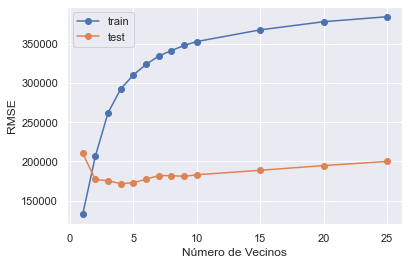

In [150]:
plt.plot(k_vecinos,lista_train,'o-',label='train' )
plt.plot(k_vecinos,lista_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')

Teniendo presente el pre-procesamiento que se realizo al entrenamiento de modelo del proyeto 1,  se puede evidenciar que la precision del modelo aumento favorablemente, ya que inicialmente el mejor modelo fue el el arbol de decision con una precicison del 0,95 frente 0,88 despues de realizar la trasnformacion de los datos, que es el valor que encontramos anteriormente, aunque la diferencia con respecto al knn-vecino mas cercano, presenta una gran diferencia de  0,88 frente a 0,64 con los anteriores datos del proyecto 1, sigue teniendo mejor ejecucion el arbol decision, frente al dataset que estamos manejando, de igual formas las metricas relacionados  presentan una  gran diferencia frente a la ultima vez e incorporando unas nuevas varaibles, que contribuyen en gran parte  en la toma de decision desde la vista del comprador como: "property_type_Casa, property_type_departamento, property_type_PH, surface_covered", que evidenciaron un fuerte impacto en el comportamiento de nuestros datos demostrados en las diferentes graficas, mejorando asi su precision y emejorando su analisis.
Esta mejora se debio al  haber realizado el metodo de escalado de datos, con la finalidad de  que el sistema tenga un rapido aprendizaje y un manejo mas agil con valores mas pequeños; no contribuyo en ningun cambio para la precision del modelo.

---

<br />
<br />

# PARTE C.2-Modelos avanzados con hiperparametros
<br />
<br />

---

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [152]:
# Para seleccionar cuales serian nuestars variables mas predominantes con el precio se escogio las siguientes, aunque no se encuentran todas, las demas no se
#tuvieron en cuenta, ya que no presentaban un impacto importante en el comportamiento de los datos, y a su vez en la precision de los modelos.
X=df3[["rooms","bedrooms","surface_total","bathrooms","property_type__Casa","property_type__Departamento","property_type__PH","l2_Capital Federal","l3_Monserrat","l3_Palermo","l3_Villa Riachuelo"]]
y=df3.price
#X=df3[["property_type__Casa","property_type__Departamento","property_type__PH","l2_Capital Federal","l3_Monserrat","l3_Palermo","l3_Villa Riachuelo"]]
#y=df3.price
#X= df3.drop(["rooms","bedrooms","price","bathrooms","property_type__Casa","property_type__Departamento","property_type__PH"],axis=1)
#y=df3.surface_total

In [153]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.30, stratify=y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [154]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)

In [155]:
y_train.min,y_train.max

(<bound method Series.min of 133932    299000.0
 106311    293045.0
 17612     140000.0
 48223     210000.0
 32216      89500.0
             ...   
 9258       80000.0
 50094     230000.0
 130215    126000.0
 2109       97000.0
 141512    399000.0
 Name: price, Length: 12483, dtype: float64>,
 <bound method Series.max of 133932    299000.0
 106311    293045.0
 17612     140000.0
 48223     210000.0
 32216      89500.0
             ...   
 9258       80000.0
 50094     230000.0
 130215    126000.0
 2109       97000.0
 141512    399000.0
 Name: price, Length: 12483, dtype: float64>)

In [156]:
y_test.min,y_test.max

(<bound method Series.min of 34694      130000.0
 35398       90000.0
 90875     1800000.0
 91845       99750.0
 127281     750000.0
             ...    
 91369      130000.0
 141913    1255000.0
 12974      100000.0
 47810      580000.0
 140144     318000.0
 Name: price, Length: 1388, dtype: float64>,
 <bound method Series.max of 34694      130000.0
 35398       90000.0
 90875     1800000.0
 91845       99750.0
 127281     750000.0
             ...    
 91369      130000.0
 141913    1255000.0
 12974      100000.0
 47810      580000.0
 140144     318000.0
 Name: price, Length: 1388, dtype: float64>)

## Modelo BaggingRegressor prediction


In [157]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

In [158]:
bagging = BaggingRegressor(random_state=42)
params_bagging={"n_estimators":[10,50,100,150,200], "bootstrap":[True], "warm_start":[True],   }
bagging.fit

<bound method BaseBagging.fit of BaggingRegressor(random_state=42)>

In [159]:
mod_bagging = GridSearchCV(bagging,param_grid=params_bagging, cv=2,n_jobs=-1)
mod_bagging.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'n_estimators': [10, 50, 100, 150, 200],
                         'warm_start': [True]})

In [160]:
print("Mejores parametros: "+str(mod_bagging.best_params_))
print("Mejor Score: "+str(mod_bagging.best_score_)+'\n')

scores = pd.DataFrame(mod_bagging.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parametros: {'bootstrap': True, 'n_estimators': 200, 'warm_start': True}
Mejor Score: 0.5856660420935165



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       2.231011      0.007848         0.340837        0.009695   
3       1.833223      0.035641         0.220602        0.000187   
2       1.245811      0.009832         0.199531        0.001473   
1       0.615320      0.004984         0.094573        0.003530   
0       0.141661      0.004486         0.021798        0.000995   

  param_bootstrap param_n_estimators param_warm_start  \
4            True                200             True   
3            True                150             True   
2            True                100             True   
1            True                 50             True   
0            True                 10             True   

                                              params  split0_test_score  \
4  {'bootstrap': True, 'n_estimators': 200, 'warm...           0.373558   
3  {'bootstrap': True, 'n_estimators': 150, 'warm...           0.373562   
2  {'bootstrap': True, 'n_estimators': 100, 'warm...           0.372744   
1  {'bootstrap': True, 'n_estimators': 50, 'warm_...           0.373217   
0  {'bootstrap': True, 'n_estimators': 10, 'warm_...           0.366617   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  
4           0.797774         0.585666        0.212108                1  
3           0.795487         0.584524        0.210962                2  
2           0.790317         0.581530        0.208786                3  
1           0.782793         0.578005        0.204788                4  
0           0.776059         0.571338        0.204721                5

In [161]:
bagging_gv=mod_bagging.predict(X_test)
bagging_result=mod_bagging.score(X_test,y_test)

In [162]:
from sklearn.metrics import mean_squared_error

y_train_pred_bagging = mod_bagging.predict(X_train)
y_test_pred_bagging = mod_bagging.predict(X_test)

rmse_train_bagging = np.sqrt(mean_squared_error(y_train, y_train_pred_bagging))
rmse_test_bagging = np.sqrt(mean_squared_error(y_test, y_test_pred_bagging))

print("RMSE en Train es:",rmse_train_bagging)
print("RMSE en Test es:",rmse_test_bagging)

RMSE en Train es: 152024.56545264032
RMSE en Test es: 161880.50346825138


In [163]:
print('DATOS DEL MODELO bagging')
print()
print('Precisión del modelo:')
print(mod_bagging.score(X_train, y_train))

DATOS DEL MODELO bagging

Precisión del modelo:
0.9081547580258618


In [164]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_train = []
lista_test = []
#X_train = []
#y_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
n_estimators= [5,10,50,100,150,200,250,300,350,400,450,500,550]

# Generamos en loop sobre los distintos valores de profundidad 
for n_estimator in n_estimators:
    
    #DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    mod_bagging = GridSearchCV(bagging,param_grid=params_bagging, cv=2,n_jobs=-1)
   

    # Entrenar el modelo
    mod_bagging.fit(X_train, y_train)
    #RFR.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred =mod_bagging.predict(X_train)
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    #MAE_train = metrics.mean_absolute_error(y_test, y_pred)
    #R2_train = tree.score(y_train, y_train_pred)
    
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = mod_bagging.predict(X_test)
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    #MAE_test = metrics.mean_absolute_error(y_test, y_pred)
    #R2_test = tree.score(y_test, y_test_pred)
   
    # Agregar la información a las listas
    lista_train.append(RMSE_train)
    lista_test.append(RMSE_test)

Text(0, 0.5, 'RMSE')

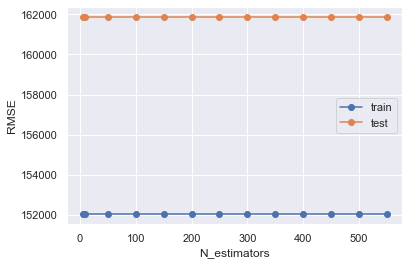

In [165]:
plt.plot(n_estimators,lista_train,'o-',label='train' )
plt.plot(n_estimators,lista_test,'o-',label='test')
plt.legend()
plt.xlabel('N_estimators')
plt.ylabel('RMSE')

## Modelo AdaBoostRegressor prediction


In [166]:
from sklearn.ensemble import AdaBoostRegressor

In [167]:
ada=AdaBoostRegressor(random_state=42)
params_ada={"n_estimators":[50,100,150.200,250,300,350,400,450,500,550],"learning_rate":[0.1],"loss":["linear"]}
ada.fit(X_train,y_train)

AdaBoostRegressor(random_state=42)

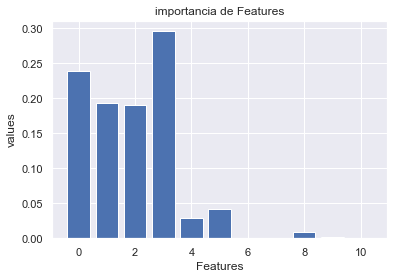

In [168]:
importancia = ada.feature_importances_

for i,v in enumerate(importancia):
    
    plt.bar([x for x in range(len(importancia))], importancia)
plt.title("importancia de Features")
plt.ylabel("values")
plt.xlabel("Features")
plt.show()

In [169]:
model_ada = GridSearchCV(ada,param_grid=params_ada, cv=2,n_jobs=-1)
model_ada.fit(X_train,y_train)

C:\Users\any-0\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.46159038 0.44260423        nan 0.43473186 0.43473186 0.43473186
 0.43473186 0.43473186 0.43473186 0.43473186]
  warnings.warn(


GridSearchCV(cv=2, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'loss': ['linear'],
                         'n_estimators': [50, 100, 150.2, 250, 300, 350, 400,
                                          450, 500, 550]})

In [170]:
from sklearn.metrics import mean_squared_error

y_train_pred_model_ada = model_ada.predict(X_train)
y_test_pred_model_ada = model_ada.predict(X_test)

rmse_train_model_ada = np.sqrt(mean_squared_error(y_train, y_train_pred_model_ada))
rmse_test_model_ada = np.sqrt(mean_squared_error(y_test, y_test_pred_model_ada))

print("RMSE en Train es:",rmse_train_model_ada)
print("RMSE en Test es:",rmse_test_model_ada)

RMSE en Train es: 267070.71756016643
RMSE en Test es: 266973.95667969866


In [171]:
print('DATOS DEL MODELO AdaBoostRegressor')
print()
print('Precisión del modelo:')
print(model_ada.score(X_train, y_train))

DATOS DEL MODELO AdaBoostRegressor

Precisión del modelo:
0.7165466018635109


In [100]:
print("Mejores parametros: "+str(model_ada.best_params_))
print("Mejor Score: "+str(model_ada.best_score_)+'\n')

scores = pd.DataFrame(model_ada.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parametros: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}
Mejor Score: -0.1755806815165476



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.542343      0.031047         0.093215        0.006325   
1       0.840036      0.107641         0.090955        0.023760   
3       0.817077      0.085636         0.101408        0.029825   
4       0.872496      0.189425         0.098285        0.011453   
5       0.792415      0.164758         0.091354        0.021709   
6       0.755693      0.152167         0.086787        0.015444   
7       0.737768      0.162454         0.082981        0.007933   
8       0.694861      0.147326         0.084487        0.019780   
9       0.669361      0.132779         0.072409        0.002366   
2       0.007966      0.002263         0.000000        0.000000   

  param_learning_rate param_loss param_n_estimators  \
0                 0.1     linear                 50   
1                 0.1     linear                100   
3                 0.1     linear                250   
4                 0.1     linear                300   
5                 0.1     linear                350   
6                 0.1     linear                400   
7                 0.1     linear                450   
8                 0.1     linear                500   
9                 0.1     linear                550   
2                 0.1     linear              150.2   

                                              params  split0_test_score  \
0  {'learning_rate': 0.1, 'loss': 'linear', 'n_es...          -0.167023   
1  {'learning_rate': 0.1, 'loss': 'linear', 'n_es...          -0.179677   
3  {'learning_rate': 0.1, 'loss': 'linear', 'n_es...          -0.179677   
4  {'learning_rate': 0.1, 'loss': 'linear', 'n_es...          -0.179677   
5  {'learning_rate': 0.1, 'loss': 'linear', 'n_es...          -0.179677   
6  {'learning_rate': 0.1, 'loss': 'linear', 'n_es...          -0.179677   
7  {'learning_rate': 0.1, 'loss': 'linear', 'n_es...          -0.179677   
8  {'learning_rate': 0.1, 'loss': 'linear', 'n_es...          -0.179677   
9  {'learning_rate': 0.1, 'loss': 'linear', 'n_es...          -0.179677   
2  {'learning_rate': 0.1, 'loss': 'linear', 'n_es...                NaN   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  
0          -0.184139        -0.175581        0.008558                1  
1          -0.184129        -0.181903        0.002226                2  
3          -0.184129        -0.181903        0.002226                2  
4          -0.184129        -0.181903        0.002226                2  
5          -0.184129        -0.181903        0.002226                2  
6          -0.184129        -0.181903        0.002226                2  
7          -0.184129        -0.181903        0.002226                2  
8          -0.184129        -0.181903        0.002226                2  
9          -0.184129        -0.181903        0.002226                2  
2                NaN              NaN             NaN               10

---

<br />
<br />

# PARTE D -COMPARACION DE MODELOS
<br />
<br />

---

Modelo: BaggingRegressor
Raíz del error cuadrático medio en Train: 551539.7302459304
Raíz del error cuadrático medio en Test: 418180.0379395205


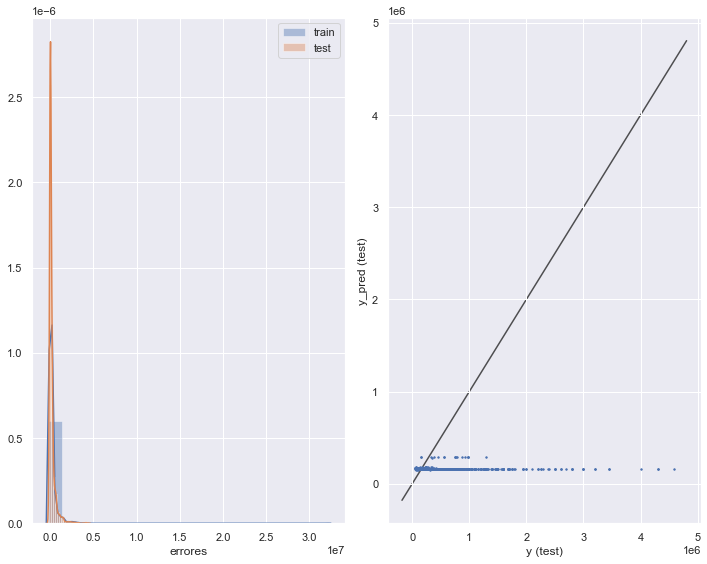

Modelo: AdaBoostRegressor
Raíz del error cuadrático medio en Train: 548399.4466554435
Raíz del error cuadrático medio en Test: 414141.5117942059


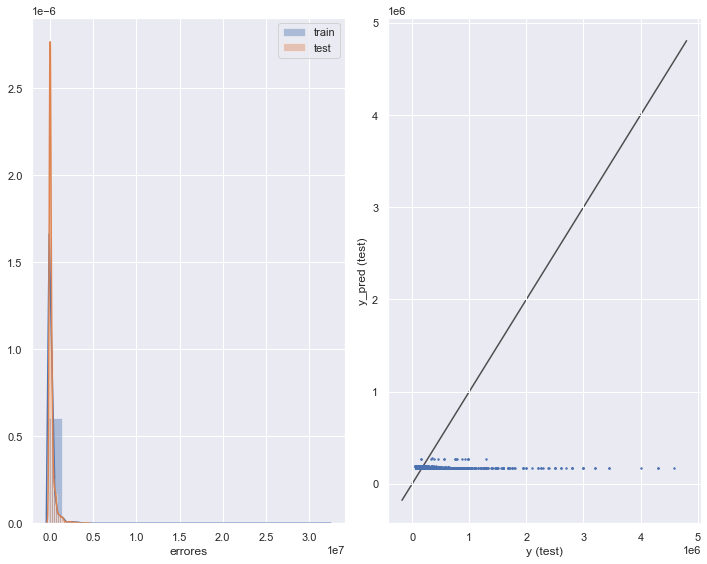

In [133]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['BaggingRegressor', 'AdaBoostRegressor']

for i, model in enumerate([ mod_bagging, model_ada]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,8))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

---

<br />
<br />

# PARTE E -APLICACION DE REDES NEURONALES
<br />
<br />

---

In [187]:
pip install pandas-datareader

## Instalar las librerias necesarias

In [62]:
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [73]:
pip install keras==2.3.1

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install tensorflow==2.1.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.1.0 (from versions: 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0)
ERROR: No matching distribution found for tensorflow==2.1.0


In [ ]:
pip install keras

In [68]:
pip install tensorflow


  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)


In [1]:
import sklearn; print("Scikit-Learn", sklearn.__version__)
#pip install==Scikit-Learn 0.19.1

Scikit-Learn 0.24.2


In [118]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [120]:
pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2



ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'C:\\Users\\any-0\\miniconda3\\Lib\\site-packages\\~klearn\\linear_model\\_cd_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



## Entrenamiento del modelo


In [67]:
# Crea tu primer MLP en Keras
#from tensorflow.python.keras.utils.np_utils import to_categorical

#from keras.models import Sequential
#from keras.layers import Dense
#import numpy
# Fija las semillas aleatorias para la reproducibilidad
#numpy.random.seed(7)

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [69]:
from tensorflow.keras import backend as k

In [70]:
#Distribucion del dataste que se utilizara para utilizar las redes neuronales
df3.head()
df3.shape

(13871, 15)

In [71]:
df3.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13871 entries, 2 to 146558
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lat                          13871 non-null  float64
 1   lon                          13871 non-null  float64
 2   rooms                        13871 non-null  float64
 3   bedrooms                     13871 non-null  float64
 4   bathrooms                    13871 non-null  float64
 5   surface_total                13871 non-null  float64
 6   surface_covered              13871 non-null  float64
 7   price                        13871 non-null  float64
 8   property_type__Casa          13871 non-null  uint8  
 9   property_type__Departamento  13871 non-null  uint8  
 10  property_type__PH            13871 non-null  uint8  
 11  l2_Capital Federal           13871 non-null  uint8  
 12  l3_Monserrat                 13871 non-null  uint8  
 13  l3_Palermo     

In [72]:
#df3["l3_Villa Riachuelo"].unique()
#df3[df3.l3_Villa Riachuelo == 'None']

In [73]:
df3.dropna()

lat        lon  rooms  bedrooms  bathrooms  surface_total  \
2      -34.593569 -58.427474    2.0       1.0        1.0           45.0   
3      -34.581294 -58.436754    2.0       1.0        1.0           85.0   
34     -34.590031 -58.423771    2.0       1.0        1.0           52.0   
35       1.000000   1.000000    2.0       1.0        2.0           81.0   
36       1.000000   1.000000    2.0       1.0        1.0           42.0   
...           ...        ...    ...       ...        ...            ...   
146554 -34.585355 -58.427194    4.0       3.0        3.0          175.0   
146555 -34.585355 -58.427194    3.0       2.0        2.0          144.0   
146556 -34.584134 -58.436389    4.0       2.0        2.0          317.0   
146557 -34.583995 -58.417645    3.0       2.0        2.0          145.0   
146558   1.000000   1.000000    4.0       3.0        5.0          220.0   

        surface_covered      price  property_type__Casa  \
2                  45.0   125000.0                    0   
3                  50.0   295000.0                    0   
34                 48.0   188000.0                    0   
35                 76.0   410000.0                    0   
36                 38.0   169000.0                    0   
...                 ...        ...                  ...   
146554            111.0   570000.0                    0   
146555            134.0   480000.0                    0   
146556            143.0   530000.0                    0   
146557            145.0   420000.0                    0   
146558            210.0  1470000.0                    0   

        property_type__Departamento  property_type__PH  l2_Capital Federal  \
2                                 0                  1                   1   
3                                 0                  1                   1   
34                                1                  0                   1   
35                                1                  0                   1   
36                                1                  0                   1   
...                             ...                ...                 ...   
146554                            0                  1                   1   
146555                            0                  1                   1   
146556                            0                  1                   1   
146557                            1                  0                   1   
146558                            1                  0                   1   

        l3_Monserrat  l3_Palermo  l3_Villa Riachuelo  
2                  0           1                   0  
3                  0           1                   0  
34                 0           1                   0  
35                 0           1                   0  
36                 0           1                   0  
...              ...         ...                 ...  
146554             0           1                   0  
146555             0           1                   0  
146556             0           1                   0  
146557             0           1                   0  
146558             0           1                   0  

[13871 rows x 15 columns]

In [74]:
df3.shape

(13871, 15)

In [75]:
# Call model on a test input
#X= df3.iloc[:, 8:14].values
#y=df3.iloc[:,7].values
#X=df3[["rooms","bedrooms","surface_total","bathrooms","property_type__Casa","property_type__Departamento","property_type__PH","l2_Capital Federal","l3_Monserrat","l3_Palermo","l3_Villa Riachuelo"]]
#y=df3.price
#X= df3[["property_type__Casa","property_type__Departamento","property_type__PH","l2_Capital Federal","l3_Monserrat","l3_Palermo","l3_Villa Riachuelo"]]
X=df3[["rooms","bedrooms","surface_total","bathrooms","property_type__Casa","property_type__Departamento","property_type__PH",]]
y=df3.price

In [76]:

#scaler = MinMaxScaler(feature_range=(0,1))
#scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

In [77]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)

In [78]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.30, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11096, 7) (2775, 7) (11096,) (2775,)


In [79]:
X_train = X_train.reshape(11096, 7)
X_test = X_test.reshape(2775, 7)

In [80]:
X_train = X_train.reshape(11096, 7).astype('float32')/25

In [81]:
X_test = X_test.reshape(2775, 7)

In [82]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Input, LeakyReLU, Activation
from sklearn.model_selection import train_test_split
#from keras.layers import LeakyReLU
#from keras.layers import Input, Dense
#from ..utils.generic_utils import transpose_shape

In [83]:
#Inicializacion de la red neuronal
classifier=Sequential()
#lrelu = LeakyReLU(alpha = 0.1)

In [85]:
classifier.add(Dense(10, activation='sigmoid', input_shape=(7,)))
#classifier.add(LeakyReLU(alpha = 0.1))
classifier.add(Dense(10, activation='softmax'))
#classifier.add(Activation('linear'))

In [86]:
#classifier.summary()

In [87]:
#Dimensionalidad de nuestro X_train 349x16x2=11096
inputs = Input(shape=(349,16,2))

In [88]:
#Agregando capa input y primera capa oculta
#
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
#classifier.add(LeakyReLU(alpha = 0.1))

#Agregando segunda capa oculta
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


In [89]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
Total params: 298
Trainable params: 298
Non-trainable params: 0
_________________________________________________________________


In [90]:
#Agregando capa de salida
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softmax'))

In [91]:
#Copilando red neuronal / Descenso de gradiente estocastica
classifier.compile(optimizer='adam',loss="mean_squared_error", metrics=['accuracy'])
#classifier.compile( optimizer='adam',loss='binary_crossentropy', metrics= ['accuracy']), optimizer = 'rmsprop

In [92]:
#Ajustando red neuronal en set de entrenamiento

#classifier.fit(X_train, y_train, batch_size=10, epochs=100)
train_history=classifier.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=(X_test,y_test))
#classifier.fit (X_train, y_train, batch_size = 32, epochs = 30, shuffle = True, verbose = 1)

Epoch 1/50
1110/1110 [==============================] - 4s 3ms/step - loss: 390869024768.0000 - accuracy: 0.0000e+00 - val_loss: 257348173824.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
1110/1110 [==============================] - 3s 3ms/step - loss: 390868860928.0000 - accuracy: 0.0000e+00 - val_loss: 257348173824.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
1110/1110 [==============================] - 4s 3ms/step - loss: 390868926464.0000 - accuracy: 0.0000e+00 - val_loss: 257348173824.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
1110/1110 [==============================] - 4s 3ms/step - loss: 390869057536.0000 - accuracy: 0.0000e+00 - val_loss: 257348173824.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
1110/1110 [==============================] - 3s 3ms/step - loss: 390869155840.0000 - accuracy: 0.0000e+00 - val_loss: 257348173824.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
1110/1110 [==============================] - 3s 3ms/step - loss: 390869254144.0000 - accuracy: 0.0000e+00 - val_loss: 2

In [93]:
#graf_model(train_history)

In [94]:
#precision(classifier, True)

In [95]:
test_loss, test_acc = classifier.evaluate(X_test, y_test)

87/87 [==============================] - 3s 3ms/step - loss: 257348272128.0000 - accuracy: 0.0000e+00


In [96]:
history_dict = train_history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [98]:
# predecting test set results
y_pred=classifier.predict(X_test)
y_pred= (y_pred>0.5)

In [99]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix (y_test, y_pred)

In [107]:
#good = (cm[0][0] + cm[1][1])/np.sum(cm)
#print (good)

In [101]:
classifier.history

In [102]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = classifier.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = classifier.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
22/22 [==============================] - 2s 1ms/step - loss: 257348272128.0000 - accuracy: 0.0000e+00
test loss, test acc: [257348272128.0, 0.0]
Generate predictions for 3 samples
predictions shape: (3, 1)


In [103]:
test_loss, test_acc = classifier.evaluate(X_test, y_test)

87/87 [==============================] - 2s 1ms/step - loss: 257348272128.0000 - accuracy: 0.0000e+00


In [104]:
print("Test accuracy:", test_acc)

Test accuracy: 0.0


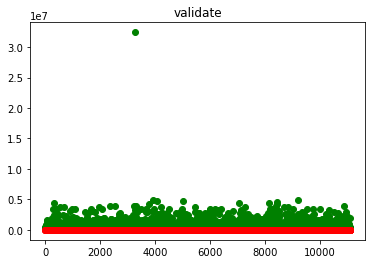

In [105]:
results=classifier.predict(X_train)
plt.scatter(range(len(y_train)),y_train,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()


## MATRIZ DE CORRELACION DE PRICE CON OTROS FEATURE


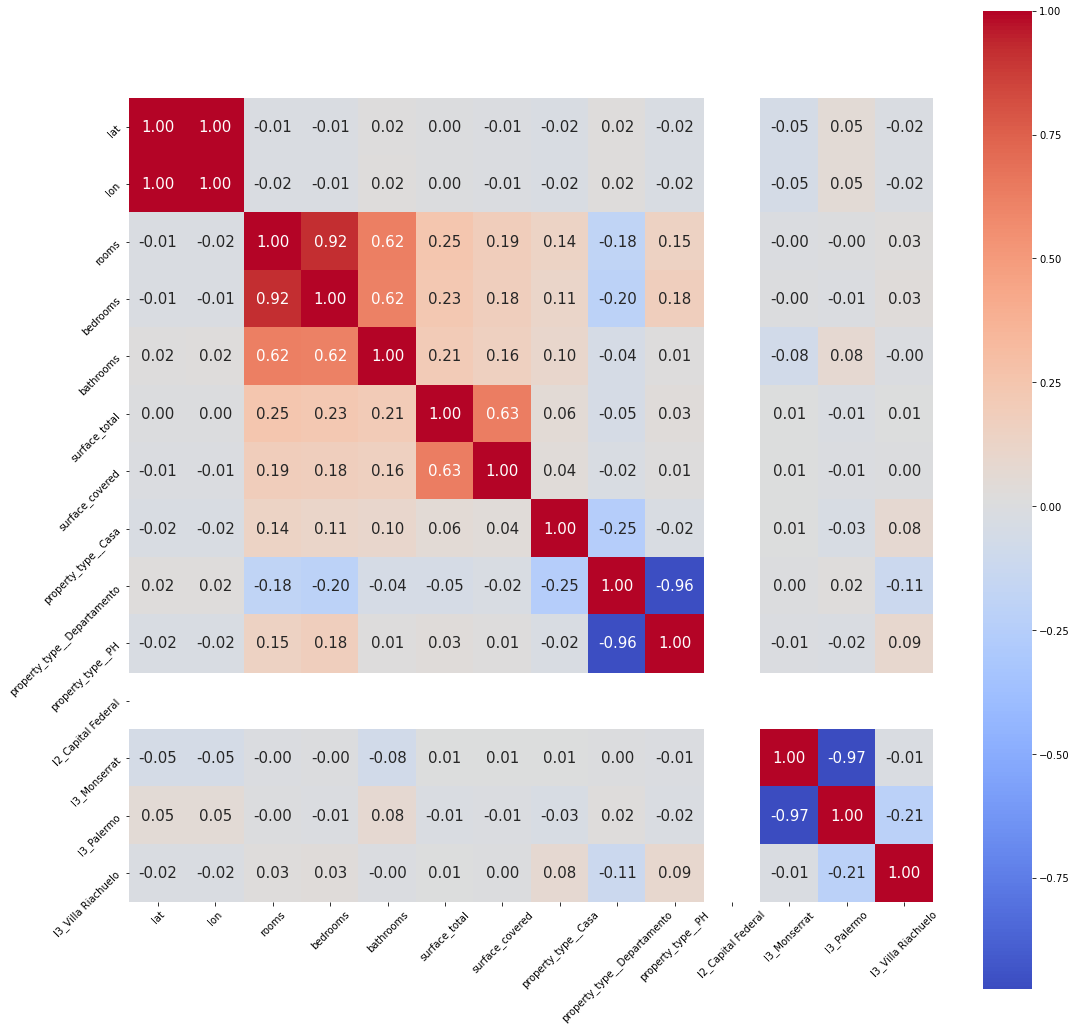

In [106]:
corr = df3.drop(columns = 'price').corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df3.drop(columns = 'price').columns, 
           yticklabels= df3.drop(columns = 'price').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [78]:
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.models import load_model

---

<br />
<br />

# PARTE F- RESULTADOS FINALES
<br />
<br />

---

### Analisis y respuestas de las incognitas:


El siguiente proyecto se realizó para realizar un análisis de cuales podrían ser los factores principales para la compra de propiedades en las diferentes zonas y ciudades del país de Argentina

¿Cuáles variables o features se tuvieron en cuenta?

Teniendo presente el proyecto 2 al momento de utilizar los mismo features se evidencia que a grandes rasgos no genero ningún tipo de cambio; se decidió cambiarlos he incorporar unas nuevas variables, las cuales fueron elegidas gracias a su comportamiento en el preprocesamiento de los datos, ya que cumplen con una alta relación con nuestra variable y= Price, los cuales fueron :  “rooms”, “bedrooms”, “bathrooms”, “Property_Casa”, “Property_PH”, “Property_Departramento”, “Surface_total”,”L2_ Capital Federal”,”L3_Palermo”, “L3_Monserrat”,”L3_Villa Riacuelo”; estas últimas variables me causaron cierta curiosidad para abordarlas, ya que al realizar un desglose pertinente en el feature “Property_type”, se demostró que componen en gran parte el dataset con referencia a los demás, por tal motivo se seleccionaron.

¿Porque utilice el modelo LightGMB?

El modelo LightGMB proporciona una mejora en la precisión en el train y el test de los datos es eficiente y eficaz al momento de abordar este tipo de dataset o de objetivos. Al hacer una debida investigación y al ser un nuevo algoritmo, maneja grandes datos con el uso de un poco memoria, esto sin añadirle algún tipo de hiperparamtro. Además de desafiar los modelos XGBoost es que el anterior modelo divide los nodos de los árboles un nivel a la vez en cambio el otro lo hace un nodo a la vez.
Se le atribuyen parámetros importantes para el desarrollo de este modelo.

¿Porque utilice las Redes Neuronales?

Las rede neuronales tienen gran uso en diferentes softwares para un sin-número de adaptaciones, se caracterizan por un manjeom adecuado de los datos entrenamiento, pero contemplando escenarios similares que se relacionen con nuestra función costo que este caso es nuestro “precio”, por lo tanto, se aplicaron las redes neuronales a este proyecto con la finalidad de abarcar en enlace entre los feature y su comportamiento con nuestra función. Cabe anotar que es la primera vez que se utiliza diferente a los modelos anteriormente descritos y evaluados, conocer su procedimiento a seguir no fue fácil, pero con ayuda de diferentes proyectos, se pudo desarrollar de una manera clara y concisa.

¿Qué paso con los modelos y cuáles fueron sus resultados?

Se tuvieron en cuenta cuatros modelos 2 con hiperparametros y los otros sin hiperparametros, los cuales fueron: Modelo LightgbmRegressor(Nuevo modelo relacionados con el XgBoost), KNeighborsRegressor( Modelo simple del vecino más cercano done n_neighbors02), Bagging( Abordaron como primera medida nuestro sesgo y varianza), y AdaBoostRegressor(Entrenando n-veces, el conjunto anterior, mejorando la optimización);Lo siguiente a esto fue la etapa de ejecución de cada uno con el hiper-parametro “GridSearch”, los resultados fueron los siguientes:

•	LightgbmRegressor:

•	R2 = 0,5411
•	RMSE = 2127
•	MAE = 9433
•	Precisión= 0, 499…….


•	KNeighborsRegressor:

•	R2 = 0,8425
•	RMSE = 17684
•	MAE = 68003
•	Precisión= 0,8546…….


•	BaggingRegressor:

•	Rmse en train = 1520
•	Rmse en test=16188
•	Precisión= 0,90815…….



•	AdaboostRegressor:

•	Rmse en train = 267070
•	Rmse en test = 266973
•	Precisión= 0,71651……
•	Variables_destacadas="property_type__Casa","property_type__Departamento","property_type__PH"


•	Redes Neuronales:

•	Total, parámetros = 298
•	Trainable parámetros = 298
•	Dense = 4..6
•	Loss = 25724827….
•	Sesgo = 10
•	Accuaracy= 0, 02345…..


Según lo anteriormente escrito se puede mostrar que el mejor desempeño de los modelos fue Bagging Regressor con alta preciso del 0,90815 y Rmse menores a los otros modelos, se efectuó un reentrenamiento con nuevas variables en x” feature con mayor relación con el precio”. 




### Conclusion: 

Teniendo presente los resultados y análisis previo en el desarrollo del proyecto, se concluyo como primera medida un análisis exploratorio del dataset que vamos examinar, esto contribuye para la elección de variables o feature con una alta relación entre ellas o que impactan de manera fuerte en nuestra función de costo y= “PRECIO”, ya que cuando se realiza el proceso de evaluación de los diferentes modelos, se puede realizar un entrenamiento mas adecuado y prolijo, para un rendimiento mas eficaz de los mismos.

El entrenamiento es uno de los procesos mas importantes en la aplicación de los modelos, ya que de esto depende considerar y elegir cual, de nuestro RMSE, MAE, R2 o precisión es mejor para nuestro proyecto.

Par finalizar recomiendo la importancia de investigar y leer otro tipo de modelos o funciones que existen en nuestro software en este caso Python, ya que nos generan el análisis de nuevos procesos con algunas variables que no se consideraron. En cuanto al proyecto abordamos redes neuronales, la cual fue gran desafío que trajo consiga una observación diferente de este dataset considerando puntos específicos de localización de las diferentes propiedades las cuales se encuentran en su mayoría de venta. 

Cabe anotar que seria adecuado analizar los factores socioeconómicos que pueden afectar también en la compra o venta de los diferentes inmuebles y tal vez resolver dudas que se generan el posible consumidor antes de adquirirla.



---

<br />
<br />

# PARTE G- ANEXOS- INFORMACION DEL NUEVO MODELO
<br />
<br />

---

##  NUEVO MODELO- - LightGBM Model( CONCEPTO Y FUNCIONES)

1. Que es LightGBM:
El modelo de LightGBm tiene como finalidad mejorar los grdaientes de machine learnig basado en arboles. Se puede tener en cuenta algunas ventajas como mejorar el uso de la memoria, mejor la precision, volver el entrenamiento mas rapido y eficente, entre otros-

Hace un par de años, Microsoft anunció su marco de aumento de gradiente LightGBM. Hoy en día, se roba el centro de atención en las máquinas de aumento de gradiente. Los Kagglers comienzan a usar LightGBM más que XGBoost. LightGBM es 6 veces más rápido que XGBoost.

Light GBM es un algoritmo relativamente nuevo y tiene una larga lista de parámetros en la documentación de LightGBM,

El tamaño del conjunto de datos está aumentando rápidamente. Se vuelve muy difícil para los algoritmos tradicionales de ciencia de datos dar resultados precisos. Light GBM tiene el prefijo Light debido a su alta velocidad. Light GBM puede manejar un gran tamaño de datos y requiere menos memoria para funcionar.

Otra razón por la que Light GBM es tan popular es porque se centra en la precisión de los resultados. LGBM también es compatible con el aprendizaje de GPU y, por lo tanto, los científicos de datos están utilizando ampliamente LGBM para el desarrollo de aplicaciones de ciencia de datos.

No es recomendable utilizar LGBM en pequeños conjuntos de datos. Light GBM es sensible al sobreajuste y puede fácilmente sobreajustar datos pequeños.

LightGBM es un marco de mejora de gradientes que utiliza un algoritmo de aprendizaje basado en árboles.
La documentación de LightGBM establece que:

LightGBM hace crecer el árbol verticalmente mientras que otros algoritmos de aprendizaje basados ​​en árboles hacen crecer los árboles horizontalmente.
Significa que LightGBM crece en forma de hojas de árboles mientras que otros algoritmos crecen en niveles. Elegirá
la hoja con máxima pérdida delta para crecer. Al cultivar la misma hoja, el algoritmo de hoja puede reducir más
pérdida que un algoritmo de nivel.

Por lo tanto, debemos comprender la distinción entre el crecimiento de los árboles por hojas y el crecimiento de árboles por niveles.
Puntos importantes sobre el crecimiento de los árboles
Si cultivamos el árbol completo, lo mejor primero (en cuanto a hojas) y en profundidad (en cuanto a nivel) dará como resultado el mismo árbol. La diferencia está en el orden en que se expande el árbol. Dado que normalmente no cultivamos árboles en toda su profundidad, el orden es importante.

La aplicación de criterios de parada temprana y métodos de poda puede dar como resultado árboles muy diferentes. Debido a que la hoja elige divisiones en función de su contribución a la pérdida global y no solo la pérdida a lo largo de una rama en particular, a menudo (no siempre) aprenderá árboles con errores más bajos "más rápido" que por nivel.

Para una pequeña cantidad de nodos, la hoja probablemente tendrá un rendimiento superior a la del nivel. A medida que agreguemos más nodos, sin detenerse ni podar, convergerán al mismo rendimiento porque, literalmente, construirán el mismo árbol eventualmente.

2. XGBoost Vs LightGBM
Tabla de contenido

XGBoost es un algoritmo ML muy rápido y preciso. Pero ahora ha sido desafiado por LightGBM, que se ejecuta aún más rápido con una precisión de modelo comparable y más hiperparámetros para que los usuarios sintonicen.

La diferencia clave en la velocidad es porque XGBoost divide los nodos del árbol un nivel a la vez y LightGBM lo hace un nodo a la vez.

Entonces, los desarrolladores de XGBoost luego mejoraron sus algoritmos para ponerse al día con LightGBM, permitiendo a los usuarios también ejecutar XGBoost en modo dividido por hoja (grow_policy = 'lossguide'). Ahora XGBoost es mucho más rápido con esta mejora, pero LightGBM sigue siendo aproximadamente 1.3X - 1.5X la velocidad de XGB.

Otra diferencia entre XGBoost y LightGBM es que XGBoost tiene una característica de la que carece LightGBM: restricción monótona. Sacrificará algo de precisión del modelo y aumentará el tiempo de entrenamiento, pero puede mejorar la interpretabilidad del modelo.

3. Parámetros de LightGBM
Tabla de contenido

LightGBM proporciona más de 100 parámetros LightGBM.

Es muy importante conocer algunos parámetros básicos de LightGBM.

Entonces, en esta sección, discutiré algunos parámetros básicos de LightGBM.

Fuente:  https://www.kaggle.com/prashant111/lightgbm-classifier-in-python